<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/Ingenieria_de_caracteristicas_formato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

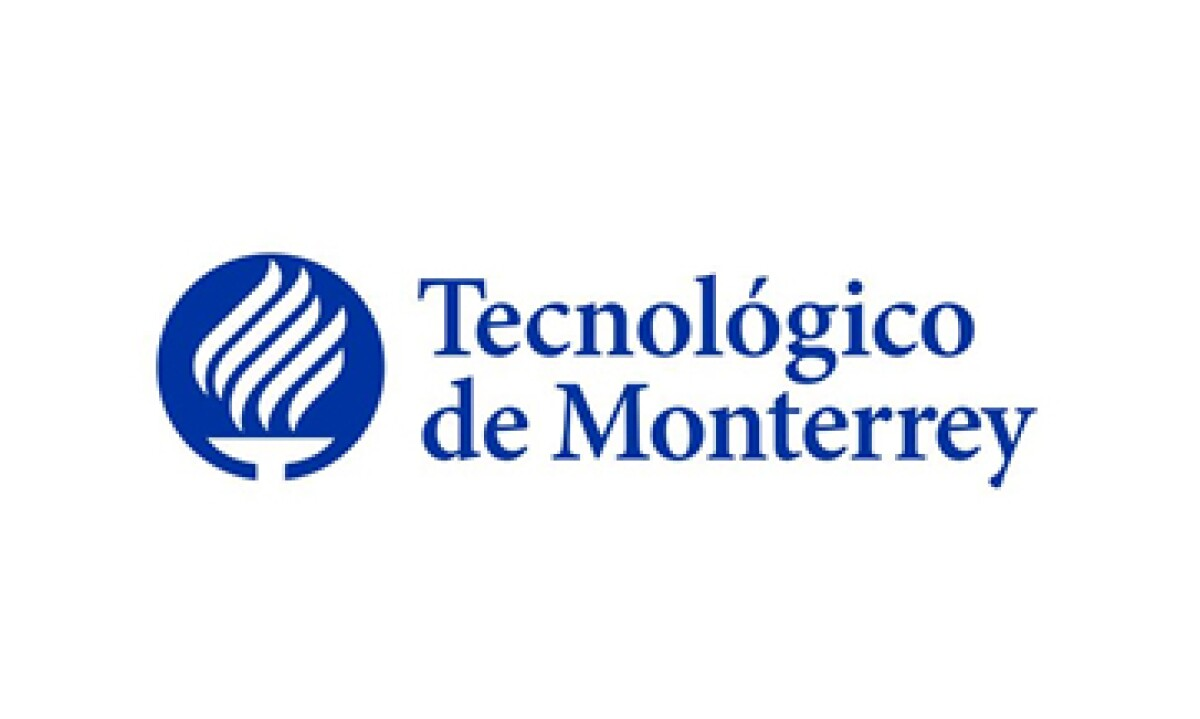

#**Maestría en Inteligencia Artificial Aplicada**
##**Proyecto Integrador**
###Tecnológico de Monterrey
###Prof Gretel Barceló Alonso

### **Semana 4**
####**Avance 2: Ingenieria de Caracteristicas**
# Equipo 1
#**Rodrigo Ruiz Gonzalez Matricula : A01793081**
#**Daniel Hernandez Mora Matricula : A01793538**
#**Juan Sebastián Téllez López Matricula : A01793859**

# 👋 **Ingenieria de caracteristicas**

---

La ingeniería de características es un proceso crucial en el análisis de datos y el aprendizaje automático. Implica transformar y seleccionar cuidadosamente las variables de los datos brutos para convertirlas en características que sean más útiles para los modelos de aprendizaje automático. El objetivo es mejorar la precisión, la eficiencia y la interpretabilidad de los modelos.

En el siguiente notebook vamos a realizar la preparación de nuestro conjunto de entrenamiento, teniendo en cuenta técnicas que nos permitan ajustar las caracteristicas, así como el conocimiento de negocio

# ➡️ **Importamos librerias e instalaciones requeridas**

---

Es importante usar las siguientes librerias porque:

- El análisis de datos a menudo implica trabajar con datos estructurados y pandas destaca en esta tarea.
- Simplifica la limpieza, transformación y análisis de datos en comparación con el uso de listas o diccionarios de Python sin formato.
- La estructura DataFrame permite operaciones intuitivas basadas en columnas (agregar, eliminar, modificar columnas).
- Proporciona métodos integrados para limpiar, filtrar, agrupar y unir datos.

In [ ]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FactorAnalysis

# ➡️ **Importamos nuestro input**

---

Nuestro Dataset está compuesto por 43 columnas con 557729 renglones, almacenados en un archivo con extension CSV

In [ ]:
#Archivo unificado y validado por cliente
df = pd.read_csv("input_final.csv", sep=',', encoding ="latin-1")
df.head(5)

,DOCUMENTO,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2,...,PRIM_CTA,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA
0,11000000821,5,NO MOTIVO,Â Asalariados.,F,23,15:45:12,15,Tarde,Tarde,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
1,11000000821,5,NO MOTIVO,Â Asalariados.,F,23,9:50:27,9,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
2,11000000821,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,9:49:51,9,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
3,11000000821,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,10:02:47,10,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
4,11000000821,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,14:23:01,14,Tarde,Mediodia,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG


# ➡️ **Separación de nuestro dataset**

---

A continuación vamos a dividir nuestro input en 3 conjuntos diferentes:

- El primero seran datos identificadores (***Nombres, documentos, números de teléfono, etc.***) Los cuales no seran parte del conjunto de entrenamiento, sino que seran utilizados para agregar la etiqueta de las predicciones.
- El segundo conjunto serán todas las variables que utilizaremos para el preprocesamiento de datos y en las cuales aplicaremos las técnicas correspondientes.
- El tercero se refiere a nuestras variables predictoras, ya que vamos a tener diferentes formas de mostrarlas para la realización de diversos experimentos desde varios enfoques.

In [ ]:
df.columns

Index(['DOCUMENTO', 'PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO',
       'EDAD', 'HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2',
       'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
       'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL',
       'CICLO_OBLIG', 'CIUDAD', 'CED_SIN_DIG', 'NOMBRES', 'SUB_PRODUCTO',
       'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL',
       'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA',
       'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO',
       'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES',
       'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA'],
      dtype='object')

## Identificadores

Los identificadores son nombres únicos que se asignan a elementos del programa, como variables, funciones, clases, etiquetas de instrucción, entre otros. Estos nombres sirven para referirse a esos elementos de manera clara y consistente
en el código, haciendo que el programa sea más legible, comprensible y fácil de mantener

seleccionamos tres columnas específicas (***'DOCUMENTO', 'CED_SIN_DIG' y 'NOMBRES'***) de los nombres de las columnas y las asignamos a un nuevo DataFrame llamado identificadores, estos no aportan datos significativos al modelo, pero nos permiten identicar los componentes de la tabla.

In [ ]:
identificadores = df.loc[:,['DOCUMENTO','CED_SIN_DIG','NOMBRES']]
identificadores.head(5)

,DOCUMENTO,CED_SIN_DIG,NOMBRES
0,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
1,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
2,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
3,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
4,11000000821,1000000821,ANA . MALAVER RODRIGUEZ


## Caracteristicas

Las variables seleccionadas son : ***'PRIORIDAD', 'MOTIVO_NO_PAGO','DESC_ACTIVIDAD', 'GENERO', 'EDAD', 'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL','RECUPERACION, 'MORA_INICIAL', 'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL', 'CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO', 'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL', 'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA', 'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO', 'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES', 'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS' y  'MARCA_TIPO_CARTERA'***



Estas variables nos serviran para:

- **Comprensión de los datos**: Es fundamental comprender el contexto del problema, las características disponibles y su significado.
- **Limpieza y preprocesamiento de datos**: Se deben abordar los valores faltantes, outliers, inconsistencias y otros problemas de calidad de datos.
- **Exploración de datos**: Visualizar y analizar los datos para comprender las distribuciones de las características, las correlaciones y las relaciones entre variables.
- **Creación y transformación de características**: Derivar nuevas características a partir de las existentes, como combinaciones, normalizaciones, escalados, discretizaciones, etc.
- **Selección de características**: Elegir las características más relevantes e informativas para el modelo, eliminando redundancias y aquellas que no aportan valor.
- **Evaluación del impacto**: Evaluar el impacto de las características seleccionadas en el rendimiento del modelo mediante pruebas e iteraciones.

In [ ]:
features = df.loc[:,['PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO','EDAD','SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
                     'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL','CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO','SALDO_OBLIG', 'MORA_OBLIG',
                     'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL','RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA','MORA_TEMPRANA',
                     'MANTENIDO', 'ACCION_MEJOR_CONTACTO','EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES','GESTION_LLAMADAS',
                     'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA']]
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,PRIM_CTA,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA
0,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
1,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
2,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
3,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
4,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG


## Variables predictoras

Las variables predictoras, también conocidas como variables independientes, variables explicativas o covariables, son aquellas que se utilizan en un modelo estadístico o de aprendizaje automático para **predecir o explicar una variable de respuesta**. En otras palabras, son las variables que se consideran como la causa de los cambios en la variable de respuesta.

In [ ]:
predictoras = df.loc[:,['HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2']]
predictoras.head(5)

,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2
0,15:45:12,15,Tarde,Tarde
1,9:50:27,9,Mañana,Mañana
2,9:49:51,9,Mañana,Mañana
3,10:02:47,10,Mañana,Mañana
4,14:23:01,14,Tarde,Mediodia


# ➡️ **Ajustar tipo de datos y posibles valores vacios en nuestras features**

---

Una vez separadas nuestras variables de interes para el modelo, vamos a iniciar por una validación de posibles valores vacios y ajuste del tipo de datos

In [ ]:
# Llenar RIESGO_ACTUAL con 0 y NO_DEF
features["RIESGO_ACTUAL"].fillna("0 NO_DEF", inplace=True)

# Redondear C_RIESGO a número entero
features["C_RIESGO"] = features["C_RIESGO"].astype(int)

# Llenar ESTADO_ICS_ACTUAL con NONE
features["ESTADO_ICS_ACTUAL"].fillna("NONE", inplace=True)

# Llenar DIAS_ACTUAL con 0
features["DIAS_ACTUAL"].fillna(0, inplace=True)

# Redondear DIAS_ACTUAL a número entero
features["DIAS_ACTUAL"] = features["DIAS_ACTUAL"].astype(int)

###################################################################################################

# Redondear SALDO_OBLIG a número entero
# Convertir valores a tipo float y manejar valores no numéricos como NaN
features["SALDO_OBLIG"] = pd.to_numeric(features["SALDO_OBLIG"], errors='coerce')

# Reemplazar valores NaN con 0
features["SALDO_OBLIG"].fillna(0, inplace=True)

# Redondear y convertir a tipo entero
features["SALDO_OBLIG"] = features["SALDO_OBLIG"].apply(lambda x: int(round(x)))

###################################################################################################

# Redondear MORA_OBLIG a número entero
# Convertir valores a tipo float y manejar valores no numéricos como NaN
features["MORA_OBLIG"] = pd.to_numeric(features["MORA_OBLIG"], errors='coerce')

# Reemplazar valores NaN con 0
features["MORA_OBLIG"].fillna(0, inplace=True)

# Redondear y convertir a tipo entero
features["MORA_OBLIG"] = features["MORA_OBLIG"].apply(lambda x: int(round(x)))

###################################################################################################

# Redondear DIAS_OBLIG a número entero
features["DIAS_OBLIG"] = features["DIAS_OBLIG"].astype(int)

###################################################################################################

# Convertir valores a tipo float y manejar valores no numéricos como NaN
features["SALDO_CL"] = pd.to_numeric(features["SALDO_CL"], errors='coerce')

# Reemplazar valores NaN con 0
features["SALDO_CL"].fillna(0, inplace=True)

# Redondear y convertir a tipo entero
features["SALDO_CL"] = features["MORA_OBLIG"].apply(lambda x: int(round(x)))

###################################################################################################

# Obtener el primer dígito de RANGO_CL
features["RANGO_CL"] = features["RANGO_CL"].apply(lambda row: int(str(row).split("_")[0]))

# Reemplazar "." por 0 en SCORE
features["SCORE"] = features["SCORE"].str.replace(".", "0")

# Cambiar el formato de F_APERTURA a DD/MM/YYYY
features["F_APERTURA"] = pd.to_datetime(features["F_APERTURA"], format='%d/%m/%Y', errors='coerce').dt.date

# Calcular la diferencia de días entre la fecha de hoy y F_APERTURA
fecha_actual = pd.Timestamp.now().normalize()  # Obtener la fecha actual en formato Timestamp
features["F_APERTURA"] = (fecha_actual - pd.to_datetime(features["F_APERTURA"])).dt.days

# Llenar valores nulos con 0
features["F_APERTURA"].fillna(0, inplace=True)

# Convertir a tipo entero
features["F_APERTURA"] = features["F_APERTURA"].astype(int)

# Redondear CANTIDAD_GESTIONES a número entero
features['CANTIDAD_GESTIONES'].fillna(0, inplace=True)
features["CANTIDAD_GESTIONES"] = features["CANTIDAD_GESTIONES"].apply(lambda x: int(round(x)))

# Redondear GESTION_LLAMADAS a número entero
features['GESTION_LLAMADAS'].fillna(0, inplace=True)
features["GESTION_LLAMADAS"] = features["GESTION_LLAMADAS"].apply(lambda x: int(round(x)))

# Redondear CONTEO_CONTACTOS_DIRECTOS a número entero
features['CONTEO_CONTACTOS_DIRECTOS'].fillna(0, inplace=True)
features["CONTEO_CONTACTOS_DIRECTOS"] = features["CONTEO_CONTACTOS_DIRECTOS"].apply(lambda x: int(round(x)))

features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,PRIM_CTA,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA
0,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
1,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
2,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
3,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
4,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG


## Validación de que ya no tengamos valores faltantes

 La validación de que no hay valores faltantes en un conjunto de datos es un paso crucial en el análisis de datos y el aprendizaje automático. Los valores faltantes, también conocidos como datos perdidos o incompletos, pueden tener un impacto significativo en la calidad y confiabilidad de los resultados.

 Es esencial para garantizar la calidad, confiabilidad y precisión de los análisis y modelos de aprendizaje automático. Al comprender y manejar adecuadamente los valores faltantes, se pueden obtener resultados más robustos y representativos de la realidad.

In [ ]:
# Calcular los valores faltantes
missing_data = features.isnull().sum()
missing_data_percentage = (missing_data / len(features)) * 100
missing_data_summary = pd.concat([missing_data, missing_data_percentage], axis=1, keys=['Total', 'Porcentaje'])
missing_data_df = pd.DataFrame(missing_data_summary, columns=['Total', 'Porcentaje'])

# Agregar un mensaje antes del DataFrame
total_records = len(features)
message = f"De un total de {total_records} registros se encuentran los siguientes valores faltantes:\n"
print(message)
missing_data_df.head(50)

De un total de 557729 registros se encuentran los siguientes valores faltantes:



,Total,Porcentaje
PRIORIDAD,0,0.0
MOTIVO_NO_PAGO,0,0.0
DESC_ACTIVIDAD,0,0.0
GENERO,0,0.0
EDAD,0,0.0
SEGMENTO_CLIENTE,0,0.0
RIESGO_ACTUAL,0,0.0
RECUPERACION,0,0.0
MORA_INICIAL,0,0.0
MORA_ACTUAL,0,0.0


# ➡️ **Generación de nuevas caracteristicas**

---

A *continuación* se dará una justificación detallada de que transformaciones se realizarán, cuales no seran necesesarias y si habra exclusión de variables por algún motivo:

- ***PRIORIDAD***: Solo basta con llenar los vacios en 0, ya que si no tienen un valor asignado no requieren una gestión inmediata.
- ***MOTIVO_NO_PAGO***: Vacios se reemplazaron por ***NO MOTIVO***, desde el archivo de unificación de bases, no se realizarán agrupaciones ya que no son tantas categorias que puedan sobredimensionar esta categoria.
- ***DESC_ACTIVIDAD***: Se requiere hacer una agrupación por categorias un poco mas generales, por ejemplo, en un grupo todas las relacionadas con comercio, otras con transporte, otras con educación, ya que hay categorias en las que solo aplica un porcentaje menor al 1% de clientes y esto puede sobredimensionar el entrenamiento del modelo innecesariamente.
- ***GENERO***: Previamente en el notebook de unificación de bases se garantizó que los valores vacíos fueran reemplazados por ***D***, lo cual indica que no son definidos, no necesitamos realizar ninguna transformación adicional.
- **EDAD**: Previamente en el notebook de unificación de bases a partir de la fecha de nacimiento en formato *dd/mm/aaaa* se hizo la diferencia al día actual para obtener la edad del cliente, por lo tanto, no necesitamos ninguna transformación adicional.
- ***SEGMENTO***: Se deja tal cual, ya que solo vienen dos categorias ***MONO_TC*** que indica que el cliente solo tiene un producto financiero y ***MULTI_TC*** que indica que el cliente tiene, mas de un producto financiero.
- ***RIESGO ACTUAL***: Actualmente viene con el estilo "0, NO, DEF, 4, MEDIO, 6, ALTO, etc". De esta columna vamos a tomar los numeros nada más, ya que entre mayor, es más el riesgo y no impacta en nada el quitar la etiqueta de la clasificación.
- ***RECUPERACIÓN***: Se dejaran las categorías como vienen, y más adelante se les aplicará la respectiva codificación para variables categóricas.
- ***MORA INICIAL*** y ***MORA ACTUAL***, ***DIAS_ACTUAL***, ***DIAS_OBLIG***: Se dejaran tal cual, ya que es la clasificación que tiene al cliente respecto a los días en mora.
- ***C_RIESGO, SCORE***: Se eliminarán valores negativos que vienen de clasificaciones incorrectas por parte del cliente y se dejaran en 0, al no conocer de que manera es calculada.
- ***ESTADO_ICS_ACTUAL***: Este es un dato proveniente del estado actual de gestión con el cliente, el cual viene por defecto en ingles, pero no afecta en su posterior codificación como variable categorica.
- ***CICLO_OBLIG***: Se deja tal cual, posteriormente se evaluará si se excluye, dependiendo de su impacto en el entrenamiento del modelo, este es un dato valioso para la operación ya que permite identificar que día el cliente debe realizar el pago.
- ***CIUDAD***: Es una caracteristica de bastante importancia para el modelo, pero evaluarse cuidadosamente la manera en que va a ser codificada, ya que no es posible mediante un "*one hot encoder*" debido al alto numero de categorías, por lo tanto se optara inicialmente por un "*Target encoding*" o una "*codificación de frecuencia agrupada*", para evitar generar columnas adicionales que sobrecarguen el entrenamiento.
- ***SUB_PRODUCTO***: No tiene tantas categorías y de momento no se evalua la posibilidad de agrupar por franquicia, ya que este campo nos especifica el tipo de producto que tiene el cliente EJ Visa Platinum, y esto puede permitir una mejor clasificación de los clientes.
- ***SALDO_OBLIG, MORA_OBLIG***: Corresponden a saldos que se dejarán en tipo entero, si bien no se realiza un ordenamiento por los saldos, si es una medición importante de la cartera a recuperar.
- ***TIPO_CLIENTE***: Es una clasificación muy importante que nos permite conocer  más sobre el comportamiento financiero del cliente.
- ***SALDO_CL***: Será excluida ya que contiene la misma información quela variable ***SALDO_OBLIG***.
- ***RANGO_SALDO***: Contiene los saldos dentro de unos rangos, los cuales son un poco amplios, sera excluida ya que se cuenta con el campo RANGO_CL el cual enumera dichos rangos de saldo y ya ahorra realizar una transformación adicional.
- ***DIAS_CL***: Sera excluida, ya que es un duplicado de ***DIAS_OBLIG***.
- ***F_APERTURA***: Previamente se hizo una transformación para tener la cantidad de días transcurridos desde la creación de la cuenta, lo cual nos daría la antiguedad del cliente y podría ayudar a la clasificación del mismo.
- ***PRIM_CTA, MORA_TEMPRANA, MANTENIDO***: Se excluirán del modelo, ya que hacen referencia a estados de cartera en los cuales se encuentra el cliente, y para esta base, todos hacen parte de un mismo segmento de clientes (Cartera reciente), que son clientes que no tienen estados de mora muy amplios.
- ***ACCION_MEJOR_CONTACTO, EFECTO_MEJOR_CONTACTO***: Se les aplicará la respectiva codificación "*one hot encoding*", ya que no tienen tantas categorias y es información histórica relevante sobre gestiones previas que ha tenido el cliente.
- ***NEGOCIACION_ACTIVA***: Nos indica si el cliente se encuentra en algun proceso para la gestión del cobro, por lo tanto se le aplicará la respectiva codificación "*one hot encoding*".
- ***CANTIDAD_GESTIONES, GESTION_LLAMADAS, CONTEO_CONTACTOS_DIRECTOS***: Referentes a intentos previos realizados al cliente, se les aplicará la respectiva codificación.
- ***MARCA_TIPO_CARTERA***: Referente a si el cliente tiene algun beneficio por parte del estado, lo cual alivianaría el momento de la negociación para la recuperación de la cartera.

## DESC_ACT

**Diccionario de Mapeo (mapeo):**

El proceso comienza con la definición de un diccionario de mapeo. Este diccionario asocia categorías generales con categorías específicas basadas en la naturaleza de los datos. Cada clave en el diccionario representa una categoría general, y su valor correspondiente es una lista de categorías específicas asociadas a esa categoría general. Por ejemplo:

mapeo = {
    "Manufactura": ["Fabricación de motores", "Fabricación de productos de metal", ...],
    "Medio ambiente": ["Captación y tratamiento de agua", "Actividades de apoyo para la extracción de petróleo", ...],
    ...
}

**Función para Aplicar el Mapeo (aplicar_mapeo):**

Se define una función llamada aplicar_mapeo que toma una categoría específica como entrada y busca en el diccionario de mapeo para encontrar la categoría general correspondiente. Si la categoría específica está presente en el diccionario de mapeo, devuelve la categoría general asociada. En caso contrario, devuelve una categoría predeterminada, como "Asalariados".
Esta función utiliza la lógica de búsqueda en el diccionario de mapeo para asignar una categoría general a cada categoría específica en el DataFrame.
Aplicación del Mapeo al DataFrame:

Se aplica la función aplicar_mapeo a la columna de interés del DataFrame features. En este caso, la columna se llama "DESC_ACTIVIDAD". La función asigna una categoría general a cada fila del DataFrame según el mapeo definido.
El resultado se almacena en una nueva columna llamada "Categoria general" en el DataFrame features.
Codificación de Target:

Para preparar los datos para el entrenamiento de un modelo de aprendizaje automático, a menudo es necesario codificar las variables categóricas en números enteros. Para esto, se utiliza la codificación de target.
Se crea una instancia de la clase LabelEncoder de scikit-learn. Esta clase asigna un número entero único a cada categoría en la columna "DESC_ACTIVIDAD".
Se ajusta y transforma la columna "DESC_ACTIVIDAD" utilizando el método fit_transform del LabelEncoder. Cada categoría única se asigna a un número entero único y se almacena en una nueva columna llamada "DESC_ACTIVIDAD_codificado" en el DataFrame features.

**Ventajas y Aportes:**

**Simplificación de Datos:** El proceso de mapeo y codificación de target simplifica los datos al reducir la complejidad de las categorías específicas a categorías generales y números enteros, respectivamente.
Facilita el Entrenamiento del Modelo: Los modelos de aprendizaje automático suelen requerir que todas las variables sean numéricas. La codificación de target convierte las variables categóricas en un formato que puede ser entendido por los algoritmos de aprendizaje automático.
**Mejora del Rendimiento del Modelo:** Al convertir las categorías en números enteros, se pueden capturar relaciones y patrones que pueden ser útiles para el modelo. Además, la codificación de target puede ayudar a reducir el sesgo que puede surgir al trabajar con variables categóricas.

In [ ]:
mapeo = {
    "Actividades agricolas": ['Actividades de apoyo a la agricultura.','Actividades de apoyo a la ganaderÃ­a.','CrÃ­a de aves de corral.','CrÃ­a de caballos y otros equinos.','CrÃ­a de ganado bovino y bufalino.','CrÃ­a de ganado porcino.',
                              'CrÃ­a de otros animales n.c.p.','Cultivo de arroz.','Cultivo de caÃ±a de azÃºcar.','Cultivo de cafÃ©.','Cultivo de cereales (excepto arroz), legumbres y semillas oleaginosas.','Cultivo de especias y de plantas aromÃ¡ticas y medicinales.',
                              'Cultivo de flor de corte.','Cultivo de frutas tropicales y subtropicales.','Cultivo de hortalizas, raÃ­ces y tubÃ©rculos.','Cultivo de palma para aceite (palma africana) y otros frutos oleaginosos.',
                              'Cultivo de plÃ¡tano y banano.','Cultivo de plantas textiles.','Cultivo de tabaco.','ExplotaciÃ³n mixta (agrÃ­cola y pecuaria).','Pesca de agua dulce.','PreparaciÃ³n del terreno.','Trilla de cafÃ©.'],
    "Actividades culturales":['CreaciÃ³n audiovisual.','CreaciÃ³n musical.','CreaciÃ³n teatral.','ctividades de exhibiciÃ³n de pelÃ­culas cinematogrÃ¡ficas y videos.'],
    "Arte":['Actividades de distribuciÃ³n de pelÃ­culas cinematogrÃ¡ficas, videos, programas, anuncios y comerciales de televisiÃ³n.','Actividades de espectÃ¡culos musicales en vivo.','Actividades de fotografÃ­a.',
            'Actividades de grabaciÃ³n de sonido y ediciÃ³n de mÃºsica.','Actividades de impresiÃ³n.','Actividades de posproducciÃ³n de pelÃ­culas cinematogrÃ¡ficas, videos, programas, anuncios y comerciales de televisiÃ³n.','Actividades de producciÃ³n de pelÃ­culas cinematogrÃ¡ficas, videos, programas, anuncios y comerciales de televisiÃ³n.',
            'Actividades de programaciÃ³n y transmisiÃ³n de televisiÃ³n.','Actividades de programaciÃ³n y transmisiÃ³n en el servicio de radiodifusiÃ³n sonora.','Actividades de servicios relacionados con la impresiÃ³n.',
            'Actividades especializadas de diseÃ±o.','Actividades teatrales.','Artes plÃ¡sticas y visuales.'],
    "Asalariados":['Asalariados.','Â Asalariados.','Â Rentistas de Capital, solo para personas naturales.','Actividades combinadas de apoyo a instalaciones.','Actividades combinadas de servicios administrativos de oficina','Actividades de administraciÃ³n de fondos.',
                   'Actividades de agencias de cobranza y oficinas de calificaciÃ³n crediticia.','Actividades de agencias de empleo temporal.','Actividades de agencias de empleo.','Actividades de agentes y corredores de seguros','Actividades de apoyo diagnÃ³stico.',
                   'Actividades de asociaciones polÃ­ticas.','Actividades de asociaciones profesionales','Actividades de asociaciones religiosas.','Actividades de bibliotecas y archivos.','Actividades de clubes deportivos.','Actividades de contabilidad, tenedurÃ­a de libros, auditorÃ­a financiera y asesorÃ­a tributaria.',
                   'Actividades de defensa.','Actividades de detectives e investigadores privados.','Actividades de las casas de cambio.','Actividades de las corporaciones financieras.','Actividades de los profesionales de compra y venta de divisas.',
                   'Actividades de mensajerÃ­a.','Actividades de otras asociaciones n.c.p.','Actividades de otros servicios de comidas.','Actividades de seguridad privada.','Actividades ejecutivas de la administraciÃ³n pÃºblica.','Actividades ejecutivas de la administración pública.',
                   'Actividades inmobiliarias realizadas a cambio de una retribuciÃ³n o por contrata.','Actividades inmobiliarias realizadas con bienes propios o arrendados.','Actividades jurÃ­dicas.',
                   'Actividades legislativas de la administraciÃ³n pÃºblica.','Actividades no diferenciadas de los hogares individuales como productores de bienes para uso propio.','Actividades no diferenciadas de los hogares individuales como productores de servicios para uso propio.',
                   'Actividades postales nacionales.','Actividades reguladoras y facilitadoras de la actividad econÃ³mica.','AdministraciÃ³n de justicia.','Almacenamiento y depÃ³sito.','Alquiler de videos y discos.','Alquiler y arrendamiento de equipo recreativo y deportivo.',
                   'Alquiler y arrendamiento de otros efectos personales y enseres domÃ©sticos n.c.p.','Alquiler y arrendamiento de otros tipos de maquinaria, equipo y bienes tangibles n.c.p.','Alquiler y arrendamiento de vehÃ­culos automotores.',
                   'CapitalizaciÃ³n.','Catering para eventos.','EvaluaciÃ³n de riesgos y daÃ±os, y otras actividades de servicios auxiliares','Instituciones especiales oficiales.','Orden pÃºblico y actividades de seguridad.','OrganizaciÃ³n de convenciones y eventos comerciales.',
                   'PeluquerÃ­a y otros tratamientos de belleza.','perfumes y preparados de tocador. FabricaciÃ³n de otros productos quÃ­micos n.c.p.','Pompas fÃºnebres y actividades relacionadas.','RÃ©gimen de ahorro individual (RAI).','RÃ©gimen de prima media con prestaciÃ³n definida (RPM).',
                   'Seguros de vida.','Seguros generales.','Servicio por horas',],
    "Aseo":['Â Actividades de los hogares individuales como empleadores de personal domÃ©stico.','Â Actividades de saneamiento ambiental y otros servicios de gestiÃ³n de desechos.','Lavado y limpieza, incluso la limpieza en seco, de productos textiles y de piel.',
            'Limpieza general interior de edificios.'],
    "Comercio al por mayor ":['Comercio al por mayor a cambio de una retribuciÃ³n o por contrata.','Comercio al por mayor de aparatos y equipo de uso domÃ©stico.','Comercio al por mayor de bebidas y tabaco.','Comercio al por mayor de calzado.','Comercio al por mayor de combustibles sÃ³lidos, lÃ­quidos, gaseosos y productos conexos.',
                              'Comercio al por mayor de computadores, equipo perifÃ©rico y programas de informÃ¡tica.','Comercio al por mayor de desperdicios, desechos y chatarra.','Comercio al por mayor de equipo, partes y piezas electrÃ³nicos y de telecomunicaciones.','Comercio al por mayor de maquinaria y equipo agropecuarios.',
                              'Comercio al por mayor de materiales de construcciÃ³n, artÃ­culos de ferreterÃ­a, pinturas, productos de vidrio, equipo y materiales de fontanerÃ­a y calefacciÃ³n.','Comercio al por mayor de metales y productos metalÃ­feros.',
                              'Comercio al por mayor de otros productos n.c.p.','Comercio al por mayor de otros tipos de maquinaria y equipo n.c.p.','Comercio al por mayor de otros utensilios domÃ©sticos n.c.p.','Comercio al por mayor de prendas de vestir.',
                              'Comercio al por mayor de productos alimenticios.','Comercio al por mayor de productos farmacÃ©uticos, medicinales, cosmÃ©ticos y de tocador.','Comercio al por mayor de productos quÃ­micos bÃ¡sicos, cauchos y plÃ¡sticos en formas primarias y productos quÃ­micos de uso agropecuario.',
                              'Comercio al por mayor de productos textiles, productos confeccionados para uso domÃ©stico.','Comercio al por mayor no especializado.'],
    "Comercio al por menor":[' Comercio al por menor de artículos y utensilios de uso doméstico.','Â Comercio al por menor de alimentos, bebidas y tabaco, en puestos de venta mÃ³viles.','Â Comercio al por menor de artÃ­culos de ferreterÃ­a, pinturas y productos de vidrio en establecimientos especializados.',
                             'Â Comercio al por menor de artÃ­culos de segunda mano.','Â Comercio al por menor de artÃ­culos deportivos, en establecimientos especializados.','Â Comercio al por menor de artÃ­culos y utensilios de uso domÃ©stico.','Â Comercio al por menor de combustible para automotores.',
                             'Â Comercio al por menor de computadores, equipos perifÃ©ricos, programas de informÃ¡tica y equipos de telecomunicaciones en establecimientos especializados.','Â Comercio al por menor de electrodomÃ©sticos y gasodomÃ©sticos de uso domÃ©stico, muebles y equipos de iluminaciÃ³n.',
                             'Â Comercio al por menor de equipos y aparatos de sonido y de video, en establecimientos especializados.','Â Comercio al por menor de libros, periÃ³dicos, materiales y artÃ­culos de papelerÃ­a y escritorio, en establecimientos especializados.',
                             'Â Comercio al por menor de lubricantes (aceites, grasas), aditivos y productos de limpieza para vehÃ­culos automotores.','Â Comercio al por menor de otros artÃ­culos culturales y de entretenimiento n.c.p. en establecimientos especializados.',
                             'Â Comercio al por menor de otros artÃ­culos domÃ©sticos en establecimientos especializados.','Â Comercio al por menor de otros productos en puestos de venta mÃ³viles.','Â Comercio al por menor de otros productos nuevos en establecimientos especializados.',
                             'Â Comercio al por menor de prendas de vestir y sus accesorios (incluye artÃ­culos de piel) en establecimientos especializados.','Â Comercio al por menor de productos farmacÃ©uticos y medicinales, cosmÃ©ticos y artÃ­culos de tocador en establecimientos especializados.',
                             'Â Comercio al por menor de productos textiles en establecimientos especializados.','Â Comercio al por menor de tapices, alfombras y cubrimientos para paredes y pisos en establecimientos especializados.','Â Comercio al por menor de todo tipo de calzado y artÃ­culos de cuero y sucedÃ¡neos del cuero en establecimientos especializados.',
                             'Â Comercio al por menor realizado a travÃ©s de casas de venta o por correo.','Â Comercio al por menor realizado a travÃ©s de internet.','abaco, en establecimientos especializados. 4721 Comercio al por menor de productos agrÃ­colas para el consumo en establecimientos especializados.',
                             'Comercio al por menor de bebidas y productos del tabaco, en establecimientos especializados.','Comercio al por menor de carnes (incluye aves de corral), productos cÃ¡rnicos, pescados y productos de mar, en establecimientos especializados.',
                             'Comercio al por menor de leche, productos lÃ¡cteos y huevos, en establecimientos especializados.','Comercio al por menor de otros productos alimenticios n.c.p., en establecimientos especializados.','Comercio al por menor en establecimientos no especializados con surtido compuesto principalmente por alimentos, bebidas o tabaco.',
                             'Comercio al por menor en establecimientos no especializados, con surtido compuesto principalmente por productos diferentes de alimentos (vÃ­veres en general), bebidas y tabaco.','Comercio de motocicletas y de sus partes, piezas y accesorios.',
                             'Comercio de partes, piezas (autopartes) y accesorios (lujos) para vehÃ­culos automotores','Comercio de vehÃ­culos automotores nuevos.','Comercio de vehÃ­culos automotores usados.','Expendio a la mesa de comidas preparadas.','Expendio de bebidas alcohÃ³licas para el consumo dentro del establecimiento.',
                             'Expendio de comidas preparadas en cafeterÃ­as.','Expendio por autoservicio de comidas preparadas.','Â Otros tipos de comercio al por menor no realizado en establecimientos, puestos de venta o mercados.'],
    "Construccion":['Â Otras actividades especializadas para la construcciÃ³n de edificios y obras de ingenierÃ­a civil.','ConstrucciÃ³n de carreteras y vÃ­as de ferrocarril.','ConstrucciÃ³n de edificios no residenciales.','ConstrucciÃ³n de edificios residenciales.',
                    'ConstrucciÃ³n de otras obras de ingenierÃ­a civil.','ConstrucciÃ³n de proyectos de servicio pÃºblico.','DemoliciÃ³n.','TerminaciÃ³n y acabado de edificios y obras de ingenierÃ­a civil.'],
    "Educacion":['Actividades de apoyo a la educaciÃ³n.','EducaciÃ³n bÃ¡sica primaria.','EducaciÃ³n bÃ¡sica secundaria.','EducaciÃ³n de instituciones universitarias o de escuelas tecnolÃ³gicas.','EducaciÃ³n de la primera infancia.',
                 'EducaciÃ³n de universidades.','EducaciÃ³n media tÃ©cnica y de formaciÃ³n laboral.','EducaciÃ³n preescolar.','EducaciÃ³n tÃ©cnica profesional.','EducaciÃ³n tecnolÃ³gica.','EnseÃ±anza cultural.','EnseÃ±anza deportiva y recreativa.'
                 'Â Investigaciones y desarrollo experimental en el campo de las ciencias naturales y la ingenierÃ­a.','Â Investigaciones y desarrollo experimental en el campo de lasÂ  cienciasÂ  sociales y las humanidades.'],
    "Elaboracion alimentos":['ElaboraciÃ³n de almidones y productos derivados del almidÃ³n.','ElaboraciÃ³n de bebidas no alcohÃ³licas, producciÃ³n de aguas minerales y de otras aguas embotelladas.','ElaboraciÃ³n de cacao, chocolate y productos de confiterÃ­a.',
                             'ElaboraciÃ³n de comidas y platos preparados.','ElaboraciÃ³n de macarrones, fideos, alcuzcuz y productos farinÃ¡ceos similares.','ElaboraciÃ³n de otros productos alimenticios n.c.p.','ElaboraciÃ³n de panela.',
                             'ElaboraciÃ³n de productos de molinerÃ­a.','ElaboraciÃ³n de productos de panaderÃ­a.','ElaboraciÃ³n de productos lÃ¡cteos.','Â Procesamiento y conservaciÃ³n de carne y productos cÃ¡rnicos.','Â Procesamiento y conservaciÃ³n de pescados, crustÃ¡ceos y moluscos.',
                             'Procesamiento y conservaciÃ³n de frutas, legumbres, hortalizas y tubÃ©rculos.','ProducciÃ³n de malta, elaboraciÃ³n de cervezas y otras bebidas malteadas.'],
    "Mantenimiento y reparacion":['Mantenimiento y reparaciÃ³n de aparatos electrÃ³nicos de consumo.','Mantenimiento y reparaciÃ³n de aparatos y equipos domÃ©sticos y de jardinerÃ­a.','Mantenimiento y reparaciÃ³n de motocicletas y de sus partes y piezas.',
                                  'Mantenimiento y reparaciÃ³n de otros efectos personales y enseres domÃ©sticos.','Mantenimiento y reparaciÃ³n de otros tipos de equipos y sus componentes n.c.p.','Mantenimiento y reparaciÃ³n de vehÃ­culos automotores.',
                                  'Mantenimiento y reparaciÃ³n especializado de equipo de transporte, excepto los vehÃ­culos automotores, motocicletas y bicicletas.','Mantenimiento y reparaciÃ³n especializado de equipo elÃ©ctrico.',
                                  'Mantenimiento y reparaciÃ³n especializado de maquinaria y equipo.','Mantenimiento y reparaciÃ³n especializado de productos elaborados en metal.'],
    "Manufactura": ["FabricaciÃ³n de motores, turbinas, y partes para motores de combustiÃ³n interna.","FabricaciÃ³n de otros productos laborados de metal n.c.p.","Aserrado, acepillado e impregnaciÃ³n de la madera.","ManipulaciÃ³n de carga.","abricaciÃ³n de equipo de mediciÃ³n, prueba, navegaciÃ³n y control",
                    "Acabado de productos textiles.","Actividad de mezcla de combustibles.","Actividades de envase y empaque.","ConfecciÃ³n de artÃ­culos con materiales textiles, excepto prendas de vestir.","ConfecciÃ³n de prendas de vestir, excepto prendas de piel.",
                    "Corretaje de valores y de contratos de productos bÃ¡sicos.","Corte, tallado y acabado de la piedra.","DestilaciÃ³n, rectificaciÃ³n y mezcla de bebidas alcohÃ³licas.","FabricaciÃ³n de artÃ­culos de cuchillerÃ­a, herramientas de mano y artÃ­culos de ferreterÃ­a.",
                    "FabricaciÃ³n de artÃ­culos de piel.","FabricaciÃ³n de artÃ­culos de plÃ¡stico n.c.p.","FabricaciÃ³n de artÃ­culos de viaje, bolsos de mano y artÃ­culos similares elaborados en cuero, y fabricaciÃ³n de artÃ­culos de talabarterÃ­a y guarnicionerÃ­a.","FabricaciÃ³n de calzado de cuero y piel, con cualquier tipo de suela.",
                    "FabricaciÃ³n de colchones y somieres.","FabricaciÃ³n de computadoras y de equipo perifÃ©rico.","FabricaciÃ³n de equipo de irradiaciÃ³n y equipo electrÃ³nico de uso mÃ©dico y terapÃ©utico.","FabricaciÃ³n de equipos elÃ©ctricos de iluminaciÃ³n.",
                    "FabricaciÃ³n de fibras sintÃ©ticas y artificiales.","FabricaciÃ³n de formas bÃ¡sicas de caucho y otros productos de caucho n.c.p.","FabricaciÃ³n de formas bÃ¡sicas de plÃ¡stico.","FabricaciÃ³n de herramientas manuales con motor.",
                    "FabricaciÃ³n de instrumentos musicales.","FabricaciÃ³n de instrumentos, aparatos y materiales mÃ©dicos y odontolÃ³gicos (incluido mobiliario).","FabricaciÃ³n de joyas, bisuterÃ­a y artÃ­culos conexos.","FabricaciÃ³n de juegos, juguetes y rompecabezas.",
                    "FabricaciÃ³n de llantas y neumÃ¡ticos de caucho","FabricaciÃ³n de maquinaria agropecuaria y forestal.","FabricaciÃ³n de maquinaria para explotaciÃ³n de minas y canteras y para obras de construcciÃ³n.","FabricaciÃ³n de maquinaria para la elaboraciÃ³n de alimentos, bebidas y tabaco",
                    "FabricaciÃ³n de maquinaria para la elaboraciÃ³n de productos textiles, prendas de vestir y cueros.","FabricaciÃ³n de maquinaria para la metalurgia.","FabricaciÃ³n de materiales de arcilla para la construcciÃ³n.","FabricaciÃ³n de medios magnÃ©ticos y Ã³pticos para almacenamiento de datos.",
                    "FabricaciÃ³n de motores, generadores y transformadores elÃ©ctricos.","FabricaciÃ³n de muebles.","FabricaciÃ³n de otros artÃ­culos textiles n.c.p.","FabricaciÃ³n de otros productos de cerÃ¡mica y porcelana.","FabricaciÃ³n de otros tipos de calzado, excepto calzado de cuero y piel.",
                    "FabricaciÃ³n de otros tipos de equipo elÃ©ctrico n.c.p.","FabricaciÃ³n de partes del calzado.","FabricaciÃ³n de partes y piezas de madera, de carpinterÃ­a y ebanisterÃ­a para la construcciÃ³n.","FabricaciÃ³n de partes, piezas (autopartes) y accesorios (lujos) para vehÃ­culos automotores.",
                    "FabricaciÃ³n de pinturas, barnices y revestimientos similares, tintas para impresiÃ³n y masillas.","FabricaciÃ³n de plÃ¡sticos en formas primarias.","FabricaciÃ³n de productos de hornos de coque.","FabricaciÃ³n de productos de la refinaciÃ³n del petrÃ³leo.",
                    "FabricaciÃ³n de productos metÃ¡licos para uso estructural.","FabricaciÃ³n de productos refractarios.","FabricaciÃ³n de recipientes de madera.","FabricaciÃ³n de relojes.","FabricaciÃ³n de tanques, depÃ³sitos y recipientes de metal, excepto los utilizados para el envase o transporte de mercancÃ­as.",
                    "FabricaciÃ³n de tapetes y alfombras para pisos.","FabricaciÃ³n de vidrio y productos de vidrio.","FormaciÃ³n acadÃ©mica no formal.","FundiciÃ³n de hierro y de acero.","Industrias bÃ¡sicas de hierro y de acero.","Industrias bÃ¡sicas de metales preciosos.",
                    "InstalaciÃ³n especializada de maquinaria y equipo industrial.","Instalaciones de fontanerÃ­a, calefacciÃ³n y aire acondicionado.","Instalaciones elÃ©ctricas.","PreparaciÃ³n e hilatura de fibras textiles.",
                    "Reencauche de llantas usadas","ReparaciÃ³n de muebles y accesorios para el hogar.","TejedurÃ­a de productos textiles."],
    "Medio ambiente": ["CaptaciÃ³n, tratamiento y distribuciÃ³n de agua.","Actividades de apoyo para la extracciÃ³n de petrÃ³leo y de gas natural.","Actividades de jardines botÃ¡nicos, zoolÃ³gicos y reservas naturales.","Acuicultura de agua dulce.","ComercializaciÃ³n de energÃ­a elÃ©ctrica.",
                       "ExtracciÃ³n de madera.","ExtracciÃ³n de minerales de hierro.","ExtracciÃ³n de oro y otros metales preciosos.","ExtracciÃ³n de piedra, arena, arcillas comunes, yeso y anhidrita.","ExtracciÃ³n de piedra, arena, arcillas, cal, yeso, caolÃ­n, bentonitas y similares",
                       "PropagaciÃ³n de plantas (actividades de los viveros, excepto viveros forestales).","RecolecciÃ³n de desechos no peligrosos.","RecuperaciÃ³n de materiales.","Suministro de vapor y aire acondicionado.","Tratamiento y disposiciÃ³n de desechos no peligrosos."],
    "Otras actividades": ['Â Actividades de juegos de azar y apuestas.','AdministraciÃ³n de mercados financieros.','Bancos comerciales.','Otras actividades auxiliares de las actividades de servicios financieros n.c.p.','Otras actividades de asistencia social sin alojamiento.',
                          'Otras actividades de atenciÃ³n de la salud humana.','Otras actividades de distribuciÃ³n de fondos.','Otras actividades de espectÃ¡culos en vivo.','Otras actividades de limpieza de edificios e instalaciones industriales.','Otras actividades de servicio de apoyo a las empresas n.c.p.',
                          'Otras actividades de servicio de informaciÃ³n n.c.p.','Otras actividades de servicio financiero, excepto las de seguros y pensiones n.c.p.','Otras actividades de servicios personales n.c.p.','Otras actividades de suministro de recurso humano.',
                          'Otras actividades de telecomunicaciones.','Otras actividades deportivas.','Otras actividades profesionales, cientÃ­ficas y tÃ©cnicas n.c.p.','Otras actividades recreativas y de esparcimiento n.c.p.','Otras actividades relacionadas con el mercado de valores.',
                          'Otras industrias manufactureras n.c.p.','Otras instalaciones especializadas.','Otros cultivos permanentes n.c.p.','Otros cultivos transitorios n.c.p.','Otros derivados del cafÃ©.','Otros servicios de reserva y actividades relacionadas.',
                          'Otros tipos de alojamiento n.c.p.','Otros tipos de educaciÃ³n n.c.p.','Otros tipos de expendio de comidas preparadas n.c.p.','Otros trabajos de ediciÃ³n.'],
    "Salud": ['Â Actividades veterinarias.','Actividades de apoyo terapÃ©utico.','Actividades de atenciÃ³n en instituciones para el cuidado de personas mayores y/o discapacitadas.','Actividades de atenciÃ³n residencial medicalizada de tipo general.','Actividades de atenciÃ³n residencial, para el cuidado de pacientes con retardo mental, enfermedad mental y consumo de sustancias psicoactivas.',
              'Actividades de hospitales y clÃ­nicas, con internaciÃ³n.','Actividades de la prÃ¡ctica mÃ©dica, sin internaciÃ³n.','Actividades de la prÃ¡ctica odontolÃ³gica.','RegulaciÃ³n de las actividades de organismos que prestan servicios de salud, educativos, culturales.y otros servicios sociales, excepto servicios de seguridad social.',
              'Servicios de seguros sociales de riesgos profesionales.','Servicios de seguros sociales de salud.'],
    "TI": ['Portales web.','Publicidad.','Â Actividades de consultorÃ­a informÃ¡tica y actividades de administraciÃ³n de instalaciones informÃ¡ticas.','Â Actividades de desarrollo de sistemas informÃ¡ticos (planificaciÃ³n, anÃ¡lisis, diseÃ±o, programaciÃ³n, pruebas).',
           'Â Arrendamiento de propiedad intelectual y productos similares, excepto obras protegidas por derechos de autor.','Â Mantenimiento y reparaciÃ³n de computadores y de equipo perifÃ©rico.','Â Mantenimiento y reparaciÃ³n de equipos de comunicaciÃ³n.',
           'Â Otras actividades de tecnologÃ­as de informaciÃ³n y actividades de servicios informÃ¡ticos.','Actividades de arquitectura e ingenierÃ­a y otras actividades conexas de consultorÃ­a tÃ©cnica.','Actividades de servicios de sistemas de seguridad.',
           'Actividades de telecomunicaciÃ³n satelital.','Actividades de telecomunicaciones alÃ¡mbricas.','Actividades de telecomunicaciones inalÃ¡mbricas.','EdiciÃ³n de directorios y listas de correo.','EdiciÃ³n de periÃ³dicos, revistas y otras publicaciones periÃ³dicas.',
           'EdiciÃ³n de programas de informÃ¡tica (software).','Ensayos y anÃ¡lisis tÃ©cnicos.','Estudios de mercado y realizaciÃ³n de encuestas de opiniÃ³n pÃºblica.','Fotocopiado, preparaciÃ³n de documentos y otras actividades especializadas de apoyo a oficina.'],
    "Transporte": ['Â Actividades de estaciones, vÃ­as y servicios complementarios para el transporte terrestre.','Â Otras actividades complementarias al transporte.','Transporte aÃ©reo nacional de pasajeros.','Transporte de carga marÃ­timo y de cabotaje.',
                   'Transporte de carga por carretera.','Transporte de pasajeros.','Transporte fÃ©rreo de carga.','Transporte fÃ©rreo de pasajeros.','Transporte fluvial de carga.','Transporte fluvial de pasajeros.','Transporte mixto.'],
    "Turismo": ['Â Alojamiento en apartahoteles.','Â Alojamiento en hoteles.','Â Alojamiento rural.','Â Otros tipos de alojamientos para visitantes.','Actividades de asistencia social sin alojamiento para personas mayores y discapacitadas.','Actividades de las agencias de viaje.',
                'Actividades de operadores turÃ­sticos.','Actividades de zonas de camping y parques para vehÃ­culos recreacionales.'],
    "NO REGISTRA":["NO REGISTRA"]
}

# Función para aplicar el mapeo
def aplicar_mapeo(categoria):
    for categoria_general, categorias_asociadas in mapeo.items():
        if categoria in categorias_asociadas:
            return categoria_general
    return "Asalariados"  # Valor predeterminado si no se encuentra ninguna categoría

# Aplicar el mapeo al df features
features["DESC_ACTIVIDAD"] = features["DESC_ACTIVIDAD"].apply(aplicar_mapeo)
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado
0,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,3,26,NO,9,1,1,PROD_DIG,2,3
1,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,3,26,NO,9,1,1,PROD_DIG,2,3
2,21,Situaciones Externas,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,3,26,NO,9,1,1,PROD_DIG,6,3
3,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,3,26,NO,9,1,1,PROD_DIG,2,3
4,5,Situaciones Externas,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,3,26,NO,9,1,1,PROD_DIG,6,3


In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustamos y transformamos la columna "DESC_ACTIVIDAD"
features["DESC_ACTIVIDAD_codificado"] = label_encoder.fit_transform(features["DESC_ACTIVIDAD"])
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,DESC_ACTIVIDAD_codificado
0,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
1,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
2,21,Situaciones Externas,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,6,3,3
3,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
4,5,Situaciones Externas,Asalariados,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,6,3,3


## RIESGO ACTUAL

**Función para Extraer el Número (extraer_numero):**

Se define una función llamada extraer_numero que toma un valor de la columna "RIESGO_ACTUAL" como entrada.
La función verifica si el valor es un número utilizando el método isdigit(). Si es un número, se devuelve tal cual.
Si el valor no es un número, se asume que es una cadena que contiene tanto el número como otros caracteres (por ejemplo, "0 NO_DEF"). La función divide la cadena por espacios utilizando el método split() y devuelve el primer elemento, que debería ser el número.

**Aplicación de la Función al DataFrame:**

Se aplica la función extraer_numero a la columna "RIESGO_ACTUAL" del DataFrame features.
El resultado de aplicar la función se almacena en la misma columna reemplazando la original "RIESGO_ACTUAL".

**Ventajas:**

**Simplificación de Datos:** El proceso de extraer solo el número de la columna "RIESGO_ACTUAL" simplifica los datos al eliminar cualquier texto adicional y dejar solo la parte numérica. Esto puede facilitar el análisis y el modelado de los datos.
**Compatibilidad con Modelado:** Al convertir los valores de la columna en números, los datos se vuelven más compatibles con los algoritmos de aprendizaje automático, que generalmente requieren entradas numéricas.
**Reducción de Dimensionalidad:** Si los valores de la columna "RIESGO_ACTUAL" contienen texto adicional que no es relevante para el análisis o el modelado, extraer solo el número puede ayudar a reducir la dimensionalidad de los datos, lo que puede ser beneficioso en términos de eficiencia computacional y rendimiento del modelo.
**Claridad y Simplicidad:** Al tener solo el número en la columna "RIESGO_ACTUAL", los datos se vuelven más claros y simples de entender, lo que puede facilitar la interpretación de los resultados del análisis y del modelo resultante.

In [ ]:
# Función para extraer el número de la columna "RIESGO_ACTUAL"
def extraer_numero(riesgo):
    if riesgo.isdigit():  # Verifica si toda la cadena es un número
        return riesgo
    else:
        return riesgo.split()[0]  # Toma el primer elemento después de dividir por espacios

# Aplicar la función a la columna "RIESGO_ACTUAL"
features["RIESGO_ACTUAL"] = features["RIESGO_ACTUAL"].apply(extraer_numero)
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,DESC_ACTIVIDAD_codificado
0,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
1,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
2,21,Situaciones Externas,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,6,3,3
3,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
4,5,Situaciones Externas,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,6,3,3


## C_RIESGO Y SCORE

**Convertir las Columnas a Tipo Numérico:**

Utilizamos la función pd.to_numeric de pandas para convertir las columnas "C_RIESGO" y "SCORE" del DataFrame features a tipo numérico.
El parámetro errors='coerce' se utiliza para manejar cualquier valor que no se pueda convertir a numérico. Con esta configuración, cualquier valor no convertible se establece como NaN (no un número).

**Función para Convertir Valores Negativos en 0 (convertir_a_cero):**

Definimos una función llamada convertir_a_cero que toma un valor como entrada.
La función verifica si el valor es negativo. Si es así, devuelve 0. Si no es negativo, devuelve el valor sin cambios.

**Aplicar la Función a las Columnas "C_RIESGO" y "SCORE":**

- Aplicamos la función convertir_a_cero a las columnas "C_RIESGO" y "SCORE" del DataFrame features utilizando el método apply.
Esta función se aplica elemento por elemento en cada columna, convirtiendo cualquier valor negativo en 0.
Resultado Final:

- Después de aplicar la función, cualquier valor negativo en las columnas "C_RIESGO" y "SCORE" se convierte en 0.
El DataFrame features ahora contiene estas columnas con valores no negativos.

**Ventajas:**

**Eliminación de Valores Negativos:** Esta transformación asegura que no haya valores negativos en las columnas "C_RIESGO" y "SCORE", lo que podría ser necesario para ciertos modelos de aprendizaje automático.
**Preparación de Datos para Modelado:** Al convertir los valores negativos en 0, estamos preparando los datos para su uso en modelos de aprendizaje automático, ya que muchos algoritmos asumen que los datos son positivos o no negativos.
**Conservación de Información:** Si bien estamos cambiando los valores negativos a 0, conservamos la información en otras partes del DataFrame, lo que permite que el modelo capture cualquier variación significativa en los datos.

In [ ]:
# Convertir las columnas a tipo numérico
features["C_RIESGO"] = pd.to_numeric(features["C_RIESGO"], errors='coerce')
features["SCORE"] = pd.to_numeric(features["SCORE"], errors='coerce')

# Función para convertir valores negativos en 0
def convertir_a_cero(valor):
    if valor < 0:
        return 0
    else:
        return valor

# Aplicar la función a las columnas "C_RIESGO" y "SCORE"
features["C_RIESGO"] = features["C_RIESGO"].apply(convertir_a_cero)
features["SCORE"] = features["SCORE"].apply(convertir_a_cero)

## CIUDAD

**Creación de la Instancia de LabelEncoder:**

Importamos la clase LabelEncoder del módulo sklearn.preprocessing.
Creamos una instancia de LabelEncoder llamada label_encoder_ciudad. Esta instancia se utilizará para codificar las categorías de la columna "ciudad" en valores numéricos.

**Ajuste y Transformación de la Columna "ciudad":**

Utilizamos el método fit_transform de LabelEncoder para ajustar y transformar la columna "ciudad" del DataFrame features.
El método fit_transform ajusta el codificador a las categorías únicas presentes en la columna "ciudad" y luego transforma esas categorías en valores numéricos.

**Almacenamiento de los Valores Codificados en una Nueva Columna:**

Los valores transformados se almacenan en una nueva columna llamada "ciudad_codificado" en el DataFrame features.
Cada categoría única de la columna "ciudad" se asigna a un valor numérico único.

**Resultado Final:**

Después de aplicar LabelEncoder, la columna "ciudad" ha sido transformada en una columna numérica almacenada en el mismo campo "ciudad".
Ahora, las categorías de la columna "ciudad" están representadas por valores numéricos, lo que facilita su uso en modelos de aprendizaje automático que requieren entradas numéricas.

**Ventajas:**

- **Preparación de Datos:** La codificación de variables categóricas en valores numéricos es una parte importante del preprocesamiento de datos para modelos de aprendizaje automático.
- **Compatibilidad con Modelos:** Muchos algoritmos de aprendizaje automático requieren que todas las entradas sean numéricas. La codificación con LabelEncoder permite que las variables categóricas sean utilizadas en estos modelos.
- **Simplicidad y Eficiencia:** LabelEncoder es fácil de usar y eficiente en términos de tiempo de ejecución, lo que lo hace adecuado para conjuntos de datos grandes.

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_ciudad = LabelEncoder()

# Ajustamos y transformamos la columna "ciudad"
features["CIUDAD"] = label_encoder_ciudad.fit_transform(features["CIUDAD"])

## Motivo de no pago

El motivo de no pago es una razón o explicación específica por la cual un cliente o usuario no ha cumplido con su obligación de realizar un pago por un producto o servicio adquirido. Esta información es crucial para las empresas y organizaciones que gestionan pagos, ya que les permite comprender las causas de la morosidad, tomar medidas correctivas y mejorar sus procesos de cobro y retención de clientes.

- **Análisis de las causas de la morosidad**: Al categorizar los motivos de no pago, las empresas pueden identificar patrones y tendencias que les ayuden a comprender las razones más comunes por las que los clientes no pagan. Esto puede ser útil para abordar problemas sistémicos, como fallos en la facturación, errores en la entrega o dificultades técnicas en el proceso de pago.
- **Priorización de los esfuerzos de cobro**: Conocer el motivo de no pago puede ayudar a las empresas a priorizar sus esfuerzos de cobro. Por ejemplo, si un cliente no ha pagado debido a un problema con la factura, es probable que sea más receptivo a un contacto para corregir el error y realizar el pago.
- **Mejora de las estrategias de retención de clientes**: Al comprender las razones por las que los clientes no pagan, las empresas pueden tomar medidas para evitar la morosidad en el futuro. Esto podría implicar mejorar la comunicación con los clientes, ofrecer opciones de pago más flexibles o implementar programas de fidelización.
- **Toma de decisiones informadas**: La información sobre los motivos de no pago puede ser utilizada por las empresas para tomar decisiones informadas sobre sus estrategias de cobro, crédito y retención de clientes. Esta información también puede ser útil para mejorar la experiencia general del cliente y reducir la tasa de morosidad.

In [ ]:
mapeo1 = {
    "Desempleo": ['INDEPENDIENTE_RED_INGRESO','DESEMPLEADO','DEUDOR DESEMPLEADO','INDEPENDIENTE_SIN_INGRESO','DEUDOR CON RECLAMO EN TRA','ILIQUIDEZ TOTAL','DEUDOR SIN CAP DE PAGO','DEUDOR SOBREENDEUDADO',
                  'SANCION_LABORAL','PAGADURIA DISMINUYO DTO','LICENCIA_NO_REMUNERADA','PASO A PENSION 2'],
    "Errores Operativos":['COND PACTADA DIFERENTE','PAGO NO APLICADO','CONDICION PACTADA DIFEREN','CANCELACION PRODUCTO','PROBLEMAS OPERATIVOS','DEUDOR SUPLANTADO/HOMONIM','GASTOS DE COBRANZAS',
                          'COLOCACION FRAUDULENTA','NO_ACEPTO_PROD','INCONSISTENCIA CENTRALESR','VENTA ENGA?OSA','DEBITO AUTOMATICO PENDIEN','DEUDOR RECLAMACION TRAMIT','DESISTEMATIZACION',
                          'CARTA REPOR MENOR VALOR','NEGOCIACION EN TRAMITE','NO LLEGAN EXTRACTOS','ERROR_APLICACION_PAGO','PAGADURIA_RETIRO_DTO','FRAUDE','PAGO PENDIENTE CONVENIO','DOCUMENTOS FALSOS',
                          'DACION EN PAGO','OPERA CUOTA CRED ANTERIOR','RECLAMO','DOCUMENTACION ILEGIBLE','ENVIA COMPROB NOMINA','ERROR DE ANALISIS','CLIENTE NUEVAMENTE ACTIVO'],
    "Falta de Voluntad Pago":['NO MOTIVO','OLVIDO PAGO','NO CONOCE CONDICIONES CR','FECHA VENCTO/FECHA INGRES','SIN_ACCESO_A_CANALES','PRIORIDAD OTROS PAGOS','DEUDOR FUERA DE LA CIUDAD','FUERA DE LA CIUDAD',
                              'SIN_CAPACIDAD_PAGO','SIN VOLUNTAD DE PAGO','DESCUIDO','TRASLADO_PAGADURIA','FUERA PAIS/CIUDAD/VIAJE','VACACIONES','SIN VOLUNTAD','DEUDOR','SIN VOLUNTAD PAGO','DEUDOR EN COBRO JURIDICO',
                              'MOVILIDAD DE LIBRANZAS','SIN CONTACTO CONVENIO','SOBREENDEUDAMIENTO'],
    "Otros":['REPARADORA DE DEUDA','NO CONOCE CONDICIONES PRO','NO CONFIRMA NOVEDAD','DEMORA SALID PASI RECOGI','NO_CONOCE_CON_FGA','CUOTA_PAC_DIFERENTE','NO_RECIBIO_PROD_TC','ASCENSO','RECIBO EXTRACTO POSTERIOR',
             'NO_ACEPTA_BENEFICIO','VEREDAL','RECHAZO VISTO BUENO','A 18 MESES','A 36 MESES','ACTIVACREDITO','BLOQUEO CUPOS','DESVINCULADO','ACTIVO INV CON PAGADURIA','A 6 MESES','NO DE ACUERDO BLOQUEO CUP'],
    "Problemas Familiares":['DEUDOR DESAPARECIDO','CALAMIDAD DOMESTICA','ASA_PROBLEMA_FAMILIAR','DESAPARECIDO','DIVORCIO/SEPARACION','DESPLAZADO','PENSION COMPARTIDA','FALLECIDO','DEUDOR SECUESTRADO','FALLECIMIENTO DEUDOR','SECUESTRADO'],
    "Problemas Legales":['PASO A PENSION','CLIENTE EMBARGADO','DEUDOR VEREDAL','RECLAMACION SEGURO','EN LA CARCEL','PRIV DERECHO CIVIL','PRESO','DEUDOR EN LA CARCEL'],
    "Situaciones Externas":['ASA_REDUCCION_INGRESOS','NO RECIBE EXTRACTOS','INCAPACIDAD_MEDICA','INCAPACIDAD PCIAL/PERMANE','INCAPACIDAD','ENDEUDAMIENTO_SIMULTANEO','AFECTADOS VILLAVICENCIO','AFECTADO SITUACION FRONTE',
                            'NO VIVE EN EL PAIS','DEUDOR NO VIVE EN EL PAIS','VICTIMAS DE LA VIOLENCIA','DESLIZAMIENTO PEREIRA','PARO NACIONAL','CODIGO MILITAR ERRADO','SITUACION MINGA','08_CRISIS TRANSPORTADORES','ES08_INUNDACIONES'],
}

# Función para aplicar el mapeo
def aplicar_mapeo(categoria):
    for categoria_general, categorias_asociadas in mapeo1.items():
        if categoria in categorias_asociadas:
            return categoria_general
    return "NO MOTIVO"  # Valor predeterminado si no se encuentra ninguna categoría

# Aplicar el mapeo al df features
features["MOTIVO_NO_PAGO"] = features["MOTIVO_NO_PAGO"].apply(aplicar_mapeo)
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,PRIM_CTA,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA
0,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
1,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
2,21,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
3,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG
4,5,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG


In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_motivo = LabelEncoder()

# Ajustamos y transformamos la columna "DESC_ACTIVIDAD"
features["MOTIVO_NO_PAGO_codificado"] = label_encoder_motivo.fit_transform(features["MOTIVO_NO_PAGO"])
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado
0,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2
1,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2
2,21,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,6
3,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2
4,5,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,6


## Sub producto

En el ámbito financiero, un subproducto bancario se refiere a un producto o servicio adicional que se ofrece a los clientes junto con un producto o servicio principal. Estos subproductos suelen estar relacionados con el producto principal y pueden aportar beneficios adicionales a los clientes, como seguros, asistencia, descuentos o programas de fidelización.

- Aumentar la rentabilidad: Al ofrecer subproductos atractivos, los bancos pueden incrementar el valor percibido de sus productos principales, lo que puede llevar a una mayor captación de clientes y un aumento de los ingresos por comisiones.
- Fidelizar a los clientes: Los subproductos pueden servir como herramienta para fidelizar a los clientes existentes, ya que les ofrecen beneficios adicionales que los motivan a mantener su relación con el banco.
Diferenciarse de la competencia: En un mercado altamente competitivo, ofrecer subproductos novedosos y diferenciados puede ayudar a los bancos a destacarse frente a sus competidores y atraer a nuevos clientes.
- Satisfacer las necesidades específicas de los clientes: Los bancos pueden diseñar subproductos específicos para atender las necesidades de diferentes segmentos de clientes, como estudiantes, personas mayores, emprendedores, entre otros.
- Fortalecer la relación con los clientes: Ofrecer subproductos relevantes y útiles puede contribuir a fortalecer la relación entre el banco y sus clientes, generando mayor confianza y satisfacción.


In [ ]:
mapeo2 = {
   "Cartera": ['CARTERA ORDINARIA','CARTERA REFINANCIADA COMERCIAL','CC CORRESPONSALES BANCARIOS','CC CUENTAS PRIVADAS','FONDO PARA EL FINANCIAMIENTO DEL SECTOR AGROPECUAR','SUST PASIVOS CR CIAL',],
   "Mastercard":['MASTER BLACK','MASTERCARD PLATINUM','MC   T C CRECER','MC TC  CLASICA','MC TC  GOLD','MC TC PLATINUM MOVISTAR','MC TC BASICA MOVISTAR','MC TC BLACK ANDRES CARNE DE RES','MC TC CLASICA ANDRES CARNE DE RES','MC TC CLASICA MOVISTAR','MC TC GOLD ANDRES CARNE DE RES','MC TC GOLD MOVISTAR','MC TC JOVEN','MC TC NUEVA BASICA','MC TC PLATINUM ANDRES CARNE DE RES','T.C. CLASICA MARCAS COMPARTIDAS','T.C. GOLD MARCAS COMPARTIDAS','T.C. PLATINUM MARCAS COMPARTIDAS','TC MARCA PROPIA BANCO DE BOGOTA'],
   "Otros Creditos":['ADELANTO DE  NOMINA - CREDITO ROTATIVO','BANCOLDEX MONEDA LEGAL','CAMPA?A PREAPROBADOS','CREDI PROGRESO MICROFINANZAS','CREDISERVICE','CREDISERVICE CIAL','CREDITO ACTIVO- PYME C','CREDITO DE CONSUMO LIBRE DESTINO','DESVINCULADOS LIBRANZA','MICROFINANZAS MB','NORMALIZACION O','OTRAS BANCOLDEX'],
   "Visa":['TC VISA CLASICA ECONOMIA','TC VISA CLASICA LAN PASS','TC VISA LOGROS','VISA  CLASICA DIGITAL','VISA  GOLD','VISA  INFINITE','VISA  PLATINUM','VISA CRECER','VISA GOLD LANPASS','VISA NUEVA BASICA','VISA PLATINUM LANPASS','VISA SIGNATURE','VISA SIGNATURE LANPASS','VISA TARJETA DISTRIBUCION'],
}

# Función para aplicar el mapeo
def aplicar_mapeo(categoria):
    for categoria_general, categorias_asociadas in mapeo2.items():
        if categoria in categorias_asociadas:
            return categoria_general
    return "Otros Creditos"  # Valor predeterminado si no se encuentra ninguna categoría

# Aplicar el mapeo al df features
features["SUB_PRODUCTO"] = features["SUB_PRODUCTO"].apply(aplicar_mapeo)
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado
0,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2
1,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2
2,21,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,6
3,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2
4,5,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,6


In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_producto = LabelEncoder()

# Ajustamos y transformamos la columna "DESC_ACTIVIDAD"
features["SUB_PRODUCTO_codificado"] = label_encoder_producto.fit_transform(features["SUB_PRODUCTO"])
features.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado
0,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2,3
1,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2,3
2,21,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,6,3
3,5,Falta de Voluntad Pago,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,2,3
4,5,Situaciones Externas,Â Asalariados.,F,23,MONO_TC,0 NO_DEF,NORMALIZADO,30,0,...,X,HACER LLAMADA,YA PAGO,NO,9,1,1,PROD_DIG,6,3


## Accion y efecto mejor contacto

Se refiere al proceso de establecer y mantener una mejor comunicación con alguien o algo. Esto podría implicar mejorar las habilidades de comunicación, hacer más esfuerzos para conectarse con los demás o utilizar la tecnología para cerrar la brecha entre las personas.

Este código utilzará el módulo LabelEncoder de la librería scikit-learn (sklearn) para convertir las etiquetas de las columnas "**ACCION_MEJOR_CONTACTO**", "**EFECTO_MEJOR_CONTACTO**" y "**ESTADO_ICS_ACTUAL**" de un formato de texto a un formato numérico

In [ ]:
# Creamos una instancia de LabelEncoder
label_encoder_accion = LabelEncoder()
label_encoder_efecto = LabelEncoder()
label_encoder_ISC = LabelEncoder()

# Ajustamos y transformamos la columna "ACCION_MEJOR_CONTACTO" y "EFECTO_MEJOR_CONTACTO"
features["ACCION_MEJOR_CONTACTO"] = label_encoder_accion.fit_transform(features["ACCION_MEJOR_CONTACTO"])
features["EFECTO_MEJOR_CONTACTO"] = label_encoder_efecto.fit_transform(features["EFECTO_MEJOR_CONTACTO"])
features["ESTADO_ICS_ACTUAL"] = label_encoder_efecto.fit_transform(features["ESTADO_ICS_ACTUAL"])

# ➡️ **Codificación de caracteristicas**

---

Se refiere al proceso de transformar variables categóricas o de texto en un formato numérico que el algoritmo de aprendizaje automático pueda entender y utilizar de manera efectiva. Juega un papel crucial en el éxito de los modelos de aprendizaje automático por varias razones:
- **Mejora la precisión del modelo**: Las características bien codificadas pueden ayudar a los modelos a aprender patrones más precisos y relevantes en los datos, lo que lleva a mejores predicciones y clasificaciones.
- **Reduce la complejidad del modelo**: Al transformar las características en representaciones más compactas y eficientes, se puede reducir la complejidad del modelo y mejorar su capacidad de generalización.
- **Facilita la interpretación del modelo**: La codificación de características puede ayudar a hacer que los modelos sean más interpretables, lo que permite comprender mejor cómo las diferentes características influyen en las predicciones.
- **Maneja datos heterogéneos**: Permite trabajar con datos de diferentes tipos, como numéricos, categóricos o textuales, convirtiéndolos en un formato compatible con los modelos de aprendizaje automático.
- **Aumenta la eficiencia computacional**: Las características codificadas de manera eficiente pueden reducir el tiempo de entrenamiento y ejecución de los modelos, especialmente cuando se trabaja con grandes conjuntos de datos.

## **Generar copia del df**

---

In [ ]:
# Generamos una copia de nuestro df para trabajar
features1 = features.copy()
features1.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,DESC_ACTIVIDAD_codificado
0,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
1,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
2,21,Situaciones Externas,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,6,3,3
3,5,Falta de Voluntad Pago,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,2,3,3
4,5,Situaciones Externas,Asalariados,F,23,MONO_TC,0,NORMALIZADO,30,0,...,3,26,NO,9,1,1,PROD_DIG,6,3,3


## **Validacion de tipos de dato**

---

La validación de tipo de dato es un proceso crucial en el manejo de información que asegura que los datos ingresados en un sistema o programa cumplan con las especificaciones de formato y tipo predefinidas. Esta validación es fundamental para garantizar la integridad, consistencia y confiabilidad de los datos, previniendo errores y asegurando que la información procesada sea válida y coherente.
- **Precisión de la información**: La validación de tipo de dato ayuda a prevenir errores de entrada de datos, como ingresar números en campos de texto o letras en campos numéricos. Esto garantiza que la información almacenada sea precisa y refleje fielmente la realidad que se pretende representar.
- **Integridad de los datos**: Al verificar que los datos cumplan con las especificaciones de formato y tipo, se protege la integridad de la información, evitando que se introduzcan valores inválidos o inconsistentes que puedan alterar los resultados de análisis o cálculos.
- **Confiabilidad del sistema**: La validación de tipo de dato contribuye a la confiabilidad del sistema al prevenir errores de procesamiento y asegurando que las operaciones se realicen sobre datos válidos y compatibles con los tipos de datos definidos.

In [ ]:
# Obtener los tipos de datos de cada columna en el DataFrame
tipos_de_dato= pd.DataFrame(features1.dtypes, columns=['Tipo de Dato'])
tipos_de_dato

,Tipo de Dato
PRIORIDAD,int64
MOTIVO_NO_PAGO,object
DESC_ACTIVIDAD,object
GENERO,object
EDAD,int64
SEGMENTO_CLIENTE,object
RIESGO_ACTUAL,object
RECUPERACION,object
MORA_INICIAL,int64
MORA_ACTUAL,int64


# ➡️ **Variables numericas**

---

A continuación se realizará el siguiente proceso

- **Exploración inicial de los datos**: Comenzamos explorando el conjunto de datos para comprender la distribución y la naturaleza de las variables numéricas. Esto nos ayuda a identificar posibles problemas, como valores atípicos, distribuciones sesgadas o valores faltantes.

- **Validación de los tipos de datos**: Verificamos que todas las variables numéricas tengan el tipo de dato correcto (por ejemplo, int o float). Esto es importante para asegurarnos de que podamos realizar cálculos y operaciones numéricas correctamente.

- **Visualización de distribuciones**: Creamos gráficos para visualizar la distribución de cada variable numérica. Esto nos permite identificar patrones, detectar valores atípicos y comprender mejor la naturaleza de los datos.

- **Discretización o binning**: Cuando las variables numéricas tienen rangos amplios o valores continuos, discretizamos o agrupamos estos valores en rangos discretos. Esto puede ayudar a simplificar modelos y mejorar la interpretación de los resultados.

- **Codificación de variables discretizadas**: Después de discretizar las variables numéricas, asignamos un valor numérico a cada rango. Esto facilita el procesamiento por parte de algoritmos de aprendizaje automático que requieren variables numéricas.

- **Estandarización o normalización**: Finalmente, aplicamos técnicas de estandarización o normalización para asegurarnos de que todas las variables numéricas estén en la misma escala. Esto es crucial para algoritmos sensibles a la escala, como aquellos que se basan en medidas de distancia o que requieren convergencia rápida.

### Creación de un df independiente para variables numéricas

In [ ]:
# Dataframe para variables numéricas
df_numericas = features1[['PRIORIDAD', 'EDAD', 'RIESGO_ACTUAL', 'MORA_INICIAL', 'MORA_ACTUAL',
                          'C_RIESGO', 'DIAS_ACTUAL', 'CICLO_OBLIG', 'SALDO_OBLIG', 'MORA_OBLIG',
                          'DIAS_OBLIG', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA',
                          'CANTIDAD_GESTIONES', 'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS',
                          'DESC_ACTIVIDAD_codificado','ACCION_MEJOR_CONTACTO','EFECTO_MEJOR_CONTACTO','ESTADO_ICS_ACTUAL','MOTIVO_NO_PAGO_codificado','SUB_PRODUCTO_codificado']]
df_numericas

,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,C_RIESGO,DIAS_ACTUAL,CICLO_OBLIG,SALDO_OBLIG,MORA_OBLIG,...,F_APERTURA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado
0,5,23,0,30,0,281,0,31,1482268,155966,...,780,9,1,1,3,3,26,6,2,3
1,5,23,0,30,0,281,0,31,1482268,155966,...,780,9,1,1,3,3,26,6,2,3
2,21,23,0,30,0,281,0,31,1482268,155966,...,780,9,1,1,3,3,26,6,6,3
3,5,23,0,30,0,281,0,31,1482268,155966,...,780,9,1,1,3,3,26,6,2,3
4,5,23,0,30,0,281,0,31,1482268,155966,...,780,9,1,1,3,3,26,6,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557724,50,54,0,60,0,400,0,15,4085823,215690,...,1306,66,46,9,6,3,23,6,0,3
557725,5,52,0,30,0,572,0,31,0,0,...,1633,25,19,4,3,3,19,6,2,3
557726,5,41,4,30,30,689,30,31,599566,282987,...,711,10,2,2,3,3,19,3,2,3
557727,32,41,4,30,30,689,30,31,599566,282987,...,711,10,2,2,3,3,19,3,2,3


### Grafico de densidad para observar distribuciones

Un gráfico de densidad, también conocido como gráfica de densidad de kernel o curva de densidad, es una representación gráfica que muestra la distribución de una variable continua. A diferencia de un histograma, que divide la variable en intervalos discretos y representa la frecuencia de cada intervalo, el gráfico de densidad proporciona una representación suave y continua de la distribución de la variable.

Características de un gráfico de densidad:
- Eje X: Representa el rango de valores de la variable continua.
- Eje Y: Representa la densidad de probabilidad, es decir, la probabilidad de que un valor particular caiga dentro de un intervalo infinitesimalmente pequeño.
- Curva: La forma de la curva refleja la distribución de la variable. Una curva con forma de campana indica una distribución normal, mientras que otras formas pueden indicar distribuciones asimétricas, bimodales o con múltiples picos.
- Área total: El área total bajo la curva siempre es igual a 1, ya que representa la probabilidad total de que la variable tome cualquier valor dentro de su rango.

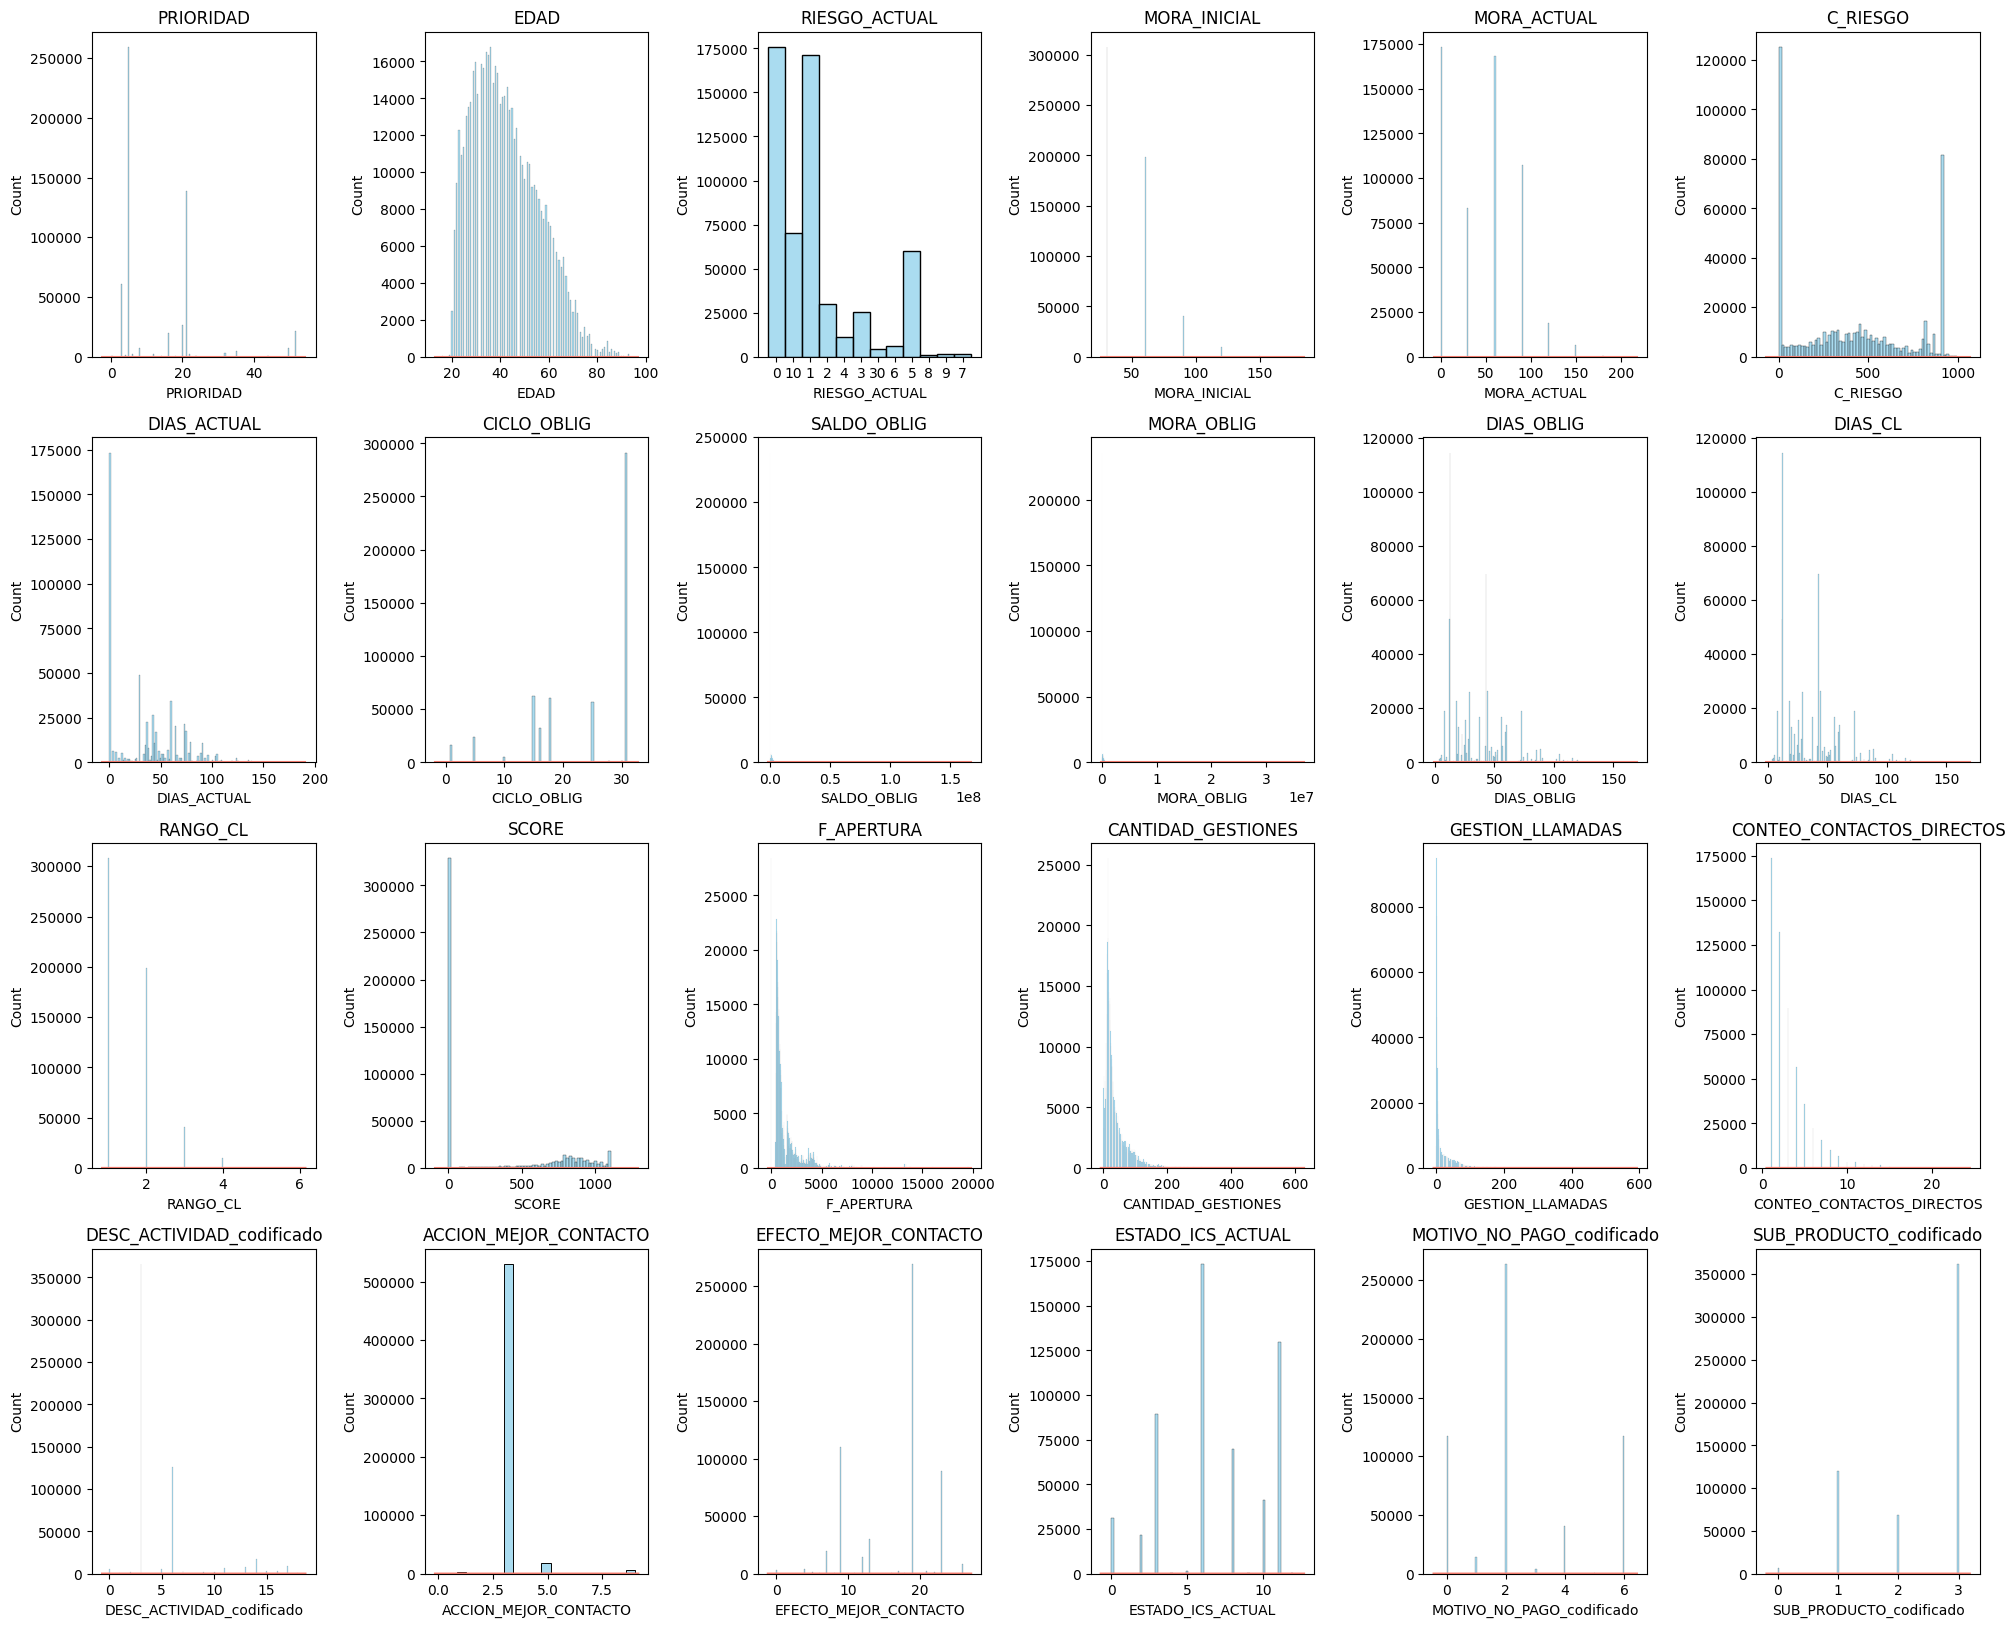

In [ ]:
# Tamaño del gráfico
plt.figure(figsize=(20, 20))

# Iterar sobre cada variable numérica
for i, columna in enumerate(df_numericas.columns):
    # Crear un nuevo subplot para cada variable
    plt.subplot(5, 6, i+1)

    # Histograma
    sns.histplot(df_numericas[columna], kde=False, color='skyblue', alpha=0.7)

    # Gráfico de Densidad
    if df_numericas[columna].dtype != 'object':  # Verificar si la variable es numérica
        sns.kdeplot(df_numericas[columna], color='salmon')

    # Configuración del título del subplot
    plt.title(columna)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Binning para variables que contienen saldos y asignarles categorias

El binning, también conocido como discretización, es el proceso de dividir una variable numérica en rangos o categorías discretas. Se utiliza en modelos de machine learning cuando se desea convertir variables numéricas en variables categóricas para diversos fines. Un par de razones de por qué necesitamos binning para variables que contienen saldos y asignarles categorías:

- **Reducción de la complejidad**: En lugar de tratar con valores numéricos continuos, el binning reduce la complejidad al agrupar valores similares en categorías discretas. Esto puede hacer que la interpretación y el análisis de los datos sean más simples y comprensibles.

- **Manejo de relaciones no lineales**: En muchos casos, la relación entre el saldo y otras variables puede no ser lineal. El binning puede capturar mejor estas relaciones no lineales al agrupar valores en rangos que tienen relaciones más uniformes con otras variables.

In [ ]:
# Encontrar el valor mínimo y máximo de la columna SALDO_OBLIG
saldo_min = df['SALDO_OBLIG'].min()
saldo_max = df['SALDO_OBLIG'].max()

# Encontrar el valor mínimo y máximo de la columna MORA_OBLIG
mora_min = df['MORA_OBLIG'].min()
mora_max = df['MORA_OBLIG'].max()

print("Valor mínimo de SALDO_OBLIG:", saldo_min)
print("Valor máximo de SALDO_OBLIG:", saldo_max)
print("Valor mínimo de MORA_OBLIG:", mora_min)
print("Valor máximo de MORA_OBLIG:", mora_max)

Valor mínimo de SALDO_OBLIG: 0.07
Valor máximo de SALDO_OBLIG: 999982.45
Valor mínimo de MORA_OBLIG: 0.0
Valor máximo de MORA_OBLIG: 999999.04


In [ ]:
# Definir los rangos de los bins para SALDO_OBLIG y MORA_OBLIG
rangos_saldo = [0, 100000, 1000000, 3000000, 5000000, 10000000]  # Aumento monótono
rangos_mora = [0, 100000, 1000000, 3000000, 5000000, 10000000]  # Aumento monótono

# Discretizar las columnas SALDO_OBLIG y MORA_OBLIG usando los rangos definidos
df_numericas.loc[:, 'SALDO_OBLIG'] = pd.cut(df_numericas['SALDO_OBLIG'], bins=rangos_saldo)
df_numericas.loc[:, 'MORA_OBLIG'] = pd.cut(df_numericas['MORA_OBLIG'], bins=rangos_mora)

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar las columnas discretizadas
df_numericas.loc[:, 'SALDO_OBLIG'] = label_encoder.fit_transform(df_numericas['SALDO_OBLIG'])
df_numericas.loc[:, 'MORA_OBLIG'] = label_encoder.fit_transform(df_numericas['MORA_OBLIG'])

# Mostrar las primeras filas del DataFrame con las columnas modificadas
df_numericas[['SALDO_OBLIG', 'MORA_OBLIG']].head()

,SALDO_OBLIG,MORA_OBLIG
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


### Normalizar los valores

Normalizar los valores, también conocido como escalamiento de datos, es una técnica fundamental en el aprendizaje automático y el análisis de datos que consiste en transformar un conjunto de datos a una escala común. Esto significa ajustar los valores de las variables a un rango específico, generalmente entre 0 y 1, o entre -1 y 1.

La normalización de datos juega un papel crucial en el éxito de los modelos de aprendizaje automático por varias razones:

- **Mejora la precisión del modelo**: Los modelos de aprendizaje automático suelen basarse en algoritmos que son sensibles a la escala de los datos. Al normalizar los valores, se asegura que todas las variables tengan una importancia similar en el proceso de entrenamiento, lo que puede mejorar la precisión del modelo y evitar que las variables con valores más grandes dominen el aprendizaje.
- **Acelera el entrenamiento del modelo**: Los algoritmos de aprendizaje automático convergen más rápido cuando las variables están normalizadas, lo que reduce el tiempo de entrenamiento y computación.
- **Facilita la comparación de variables**: Cuando las variables están en diferentes escalas, es difícil compararlas directamente. La normalización permite comparar las variables de manera justa y evaluar su importancia relativa en el modelo.

In [ ]:
# Crear una instancia del normalizador estándar
scaler = StandardScaler()

# Aplicar la estandarización a tu DataFrame numérico
df_numericas_norm_standard = pd.DataFrame(scaler.fit_transform(df_numericas), columns=df_numericas.columns)

### Evaluar distribuciones finales

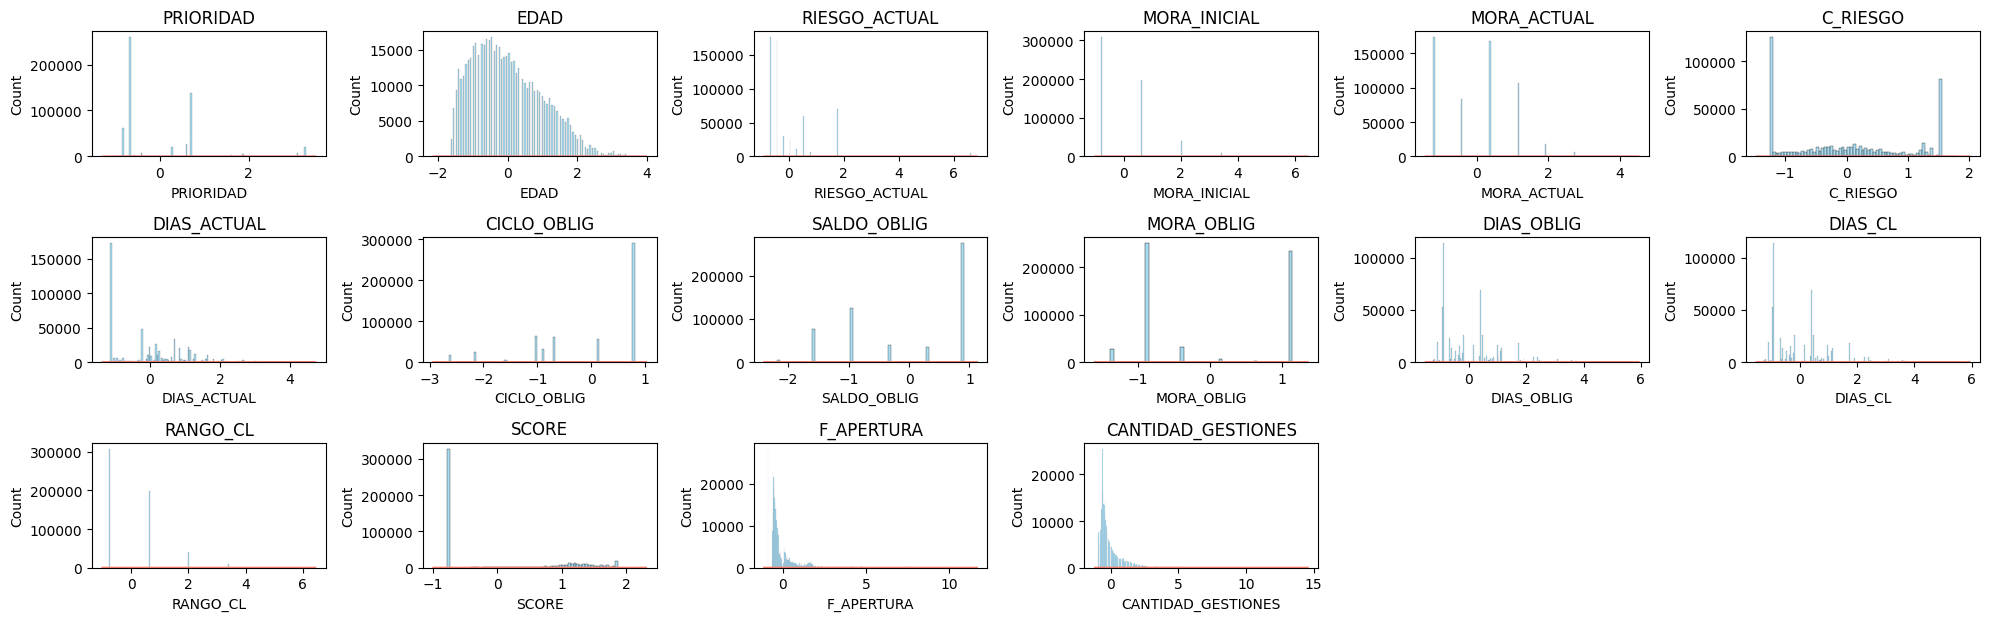

In [ ]:
# Configuración del tamaño de la figura
plt.figure(figsize=(20, 10))

# Obtener el número total de columnas en el DataFrame
num_columnas = len(df_numericas_norm_standard.columns)

# Iterar sobre todas las columnas numéricas estandarizadas
for i, columna in enumerate(df_numericas_norm_standard.columns):
    # Si hemos alcanzado el límite máximo de subplots, salimos del bucle
    if i >= 16:
        break

    # Crear un subplot para cada columna
    plt.subplot(5, 6, i + 1)

    # Gráfico de Histograma
    sns.histplot(df_numericas_norm_standard[columna], kde=False, color='skyblue', alpha=0.7)

    # Gráfico de Densidad
    sns.kdeplot(df_numericas_norm_standard[columna], color='salmon')

    # Configuración del título del subplot
    plt.title(columna)

# Ajustar automáticamente la disposición de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Prueba de normalidad de Shapiro - Wilk

La prueba de normalidad de Shapiro-Wilk se utiliza en estadística para evaluar si una muestra de datos sigue una distribución normal o gaussiana, ya que ayuda a verificar si los datos cumplen con las suposiciones de normalidad requeridas por ciertos modelos y pruebas estadísticas, y también puede ayudar a identificar valores atípicos en los datos. Esta prueba nos ayuda a identificar los siguientes puntos:

- **Suposiciones de los modelos paramétricos**: Algunos modelos de machine learning, como la regresión lineal, asumen que los datos tienen una distribución normal. Antes de aplicar estos modelos, es importante verificar si esta suposición se cumple utilizando pruebas de normalidad como la prueba de Shapiro-Wilk.

- **Selección de pruebas estadísticas**: Algunas pruebas estadísticas, como la prueba t de Student o el análisis de varianza (ANOVA), también asumen normalidad en los datos. La prueba de Shapiro-Wilk puede ayudar a determinar si es apropiado utilizar estas pruebas en un análisis determinado.

- **Transformación de datos**: Si los datos no siguen una distribución normal, puede ser necesario aplicar transformaciones a los datos para hacer que se ajusten mejor a esta distribución. La prueba de Shapiro-Wilk puede ayudar a identificar la necesidad de tales transformaciones.

- **Identificación de valores atípicos**: La distribución normal es sensible a valores atípicos. La prueba de Shapiro-Wilk puede ayudar a detectar si los datos contienen valores extremos que podrían afectar negativamente la validez de los análisis de modelos de machine learning

In [ ]:
from scipy.stats import shapiro

# Crear una lista para almacenar los resultados de la prueba de normalidad
resultados_shapiro = []

# Iterar sobre todas las columnas numéricas estandarizadas
for columna in df_numericas_norm_standard.columns:
    # Aplicar la prueba de Shapiro-Wilk
    stat, p_valor = shapiro(df_numericas_norm_standard[columna])

    # Almacenar los resultados en la lista
    resultados_shapiro.append((columna, stat, p_valor))

# Imprimir los resultados
for resultado in resultados_shapiro:
    print("Variable:", resultado[0])
    print("Estadística de prueba:", resultado[1])
    print("Valor p:", resultado[2])
    print("")

# Interpretar los resultados
alfa = 0.05  # Nivel de significancia
for resultado in resultados_shapiro:
    if resultado[2] > alfa:
        print("No se rechaza la hipótesis nula para la variable", resultado[0], ": los datos parecen seguir una distribución normal.")
    else:
        print("Se rechaza la hipótesis nula para la variable", resultado[0], ": los datos no siguen una distribución normal.")

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Variable: PRIORIDAD
Estadística de prueba: 0.7074770331382751
Valor p: 0.0

Variable: EDAD
Estadística de prueba: 0.9662963151931763
Valor p: 0.0

Variable: RIESGO_ACTUAL
Estadística de prueba: 0.649579644203186
Valor p: 0.0

Variable: MORA_INICIAL
Estadística de prueba: 0.7279762625694275
Valor p: 0.0

Variable: MORA_ACTUAL
Estadística de prueba: 0.8789600729942322
Valor p: 0.0

Variable: C_RIESGO
Estadística de prueba: 0.8941881656646729
Valor p: 0.0

Variable: DIAS_ACTUAL
Estadística de prueba: 0.9058278799057007
Valor p: 0.0

Variable: CICLO_OBLIG
Estadística de prueba: 0.7802556157112122
Valor p: 0.0

Variable: SALDO_OBLIG
Estadística de prueba: 0.7755340337753296
Valor p: 0.0

Variable: MORA_OBLIG
Estadística de prueba: 0.7185747027397156
Valor p: 0.0

Variable: DIAS_OBLIG
Estadística de prueba: 0.8776905536651611
Valor p: 0.0

Variable: DIAS_CL
Estadística de prueba: 0.8776905536651611
Valor p: 0.0

Variable: RANGO_CL
Estadística de prueba: 0.7279762625694275
Valor p: 0.0

Varia

### Discusión de resultados

De acuerdo a los resultados obtenidos en la prueba de normalidad de los datos, surge la pregunta sobre su idoneidad para modelos estadísticos y de aprendizaje automático basados en supuestos lineales. Es crucial recordar que la normalidad de los datos es un requisito fundamental en muchos contextos, especialmente en modelos lineales como la regresión lineal, donde garantiza la precisión de las estimaciones de parámetros y la validez de los supuestos del modelo.

Sin embargo, en nuestro caso, donde estamos contemplando la implementación de un modelo de clasificación binaria, como Random Forest u otros (Los cuales validaremos en la siguiente entrega), la discusión sobre la normalidad de los datos toma un matiz diferente. Mientras que los modelos lineales requieren una distribución normal de los datos para su correcta aplicación, los modelos de clasificación son menos sensibles a este supuesto. De hecho, los modelos de clasificación, y específicamente los basados en árboles de decisión como Random Forest, son capaces de manejar distribuciones no normales y capturar relaciones no lineales entre las características y la variable objetivo de manera efectiva.

Por lo tanto, aunque los resultados de la prueba de normalidad puedan indicar que los datos no siguen una distribución normal, esto no impide la construcción de un modelo de clasificación sólido y efectivo. La versatilidad inherente a los modelos de clasificación, junto con su capacidad para identificar patrones complejos en los datos, sugiere que son una opción adecuada para nuestro problema específico. De hecho, la robustez de estos modelos ante distribuciones no normales puede incluso representar una ventaja, ya que pueden adaptarse mejor a la complejidad inherente de los datos del mundo real.

# ➡️ **Variables categoricas**

---

También conocidas como variables cualitativas o variables de atributos, son un tipo de variable en estadística que se utiliza para clasificar o agrupar observaciones en función de una característica o atributo común. A diferencia de las variables cuantitativas, que se miden en una escala numérica y pueden tomar valores infinitos o contables, las variables categóricas solo pueden tomar un número finito y predefinido de valores discretos.

- **Valores discretos**: Las variables categóricas solo pueden tomar un número finito y predefinido de valores discretos. Por ejemplo, el género (masculino, femenino), el color del cabello (negro, castaño, rubio), el tipo de sangre (A, B, AB, O) o el estado civil (soltero, casado, viudo, divorciado) son todas variables categóricas.
- **No tienen orden natural**: Los valores de una variable categórica no tienen un orden natural o jerarquía inherente. Por ejemplo, no se puede decir que "masculino" sea mayor o menor que "femenino", o que "negro" sea más oscuro que "castaño".
- **Niveles de medición**: Las variables categóricas se pueden clasificar en dos niveles de medición:
- **Nominales**: Las variables nominales tienen valores que no tienen ningún orden o relación entre sí. Por ejemplo, el género, el color del cabello o el tipo de sangre son variables nominales.
- **Ordinales**: Las variables ordinales tienen valores que tienen un orden o jerarquía, pero la diferencia entre los valores no se puede medir numéricamente. Por ejemplo, la clasificación de una película (mala, regular, buena, excelente) o el nivel de educación (primaria, secundaria, universitaria, posgrado) son variables ordinales.

In [ ]:
# Dataframe para variables categóricas
df_categoricas = features1[['GENERO', 'SEGMENTO_CLIENTE','RECUPERACION','NEGOCIACION_ACTIVA','MARCA_TIPO_CARTERA']]
df_categoricas

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA
0,F,MONO_TC,NORMALIZADO,NO,PROD_DIG
1,F,MONO_TC,NORMALIZADO,NO,PROD_DIG
2,F,MONO_TC,NORMALIZADO,NO,PROD_DIG
3,F,MONO_TC,NORMALIZADO,NO,PROD_DIG
4,F,MONO_TC,NORMALIZADO,NO,PROD_DIG
...,...,...,...,...,...
557724,M,MONO_TC,NORMALIZADO,NO,PROD_DIG
557725,M,MONO_TC,NORMALIZADO,NO,PROD_DIG
557726,M,MONO_TC,POR_VENCER,NO,FGA
557727,M,MONO_TC,POR_VENCER,NO,FGA


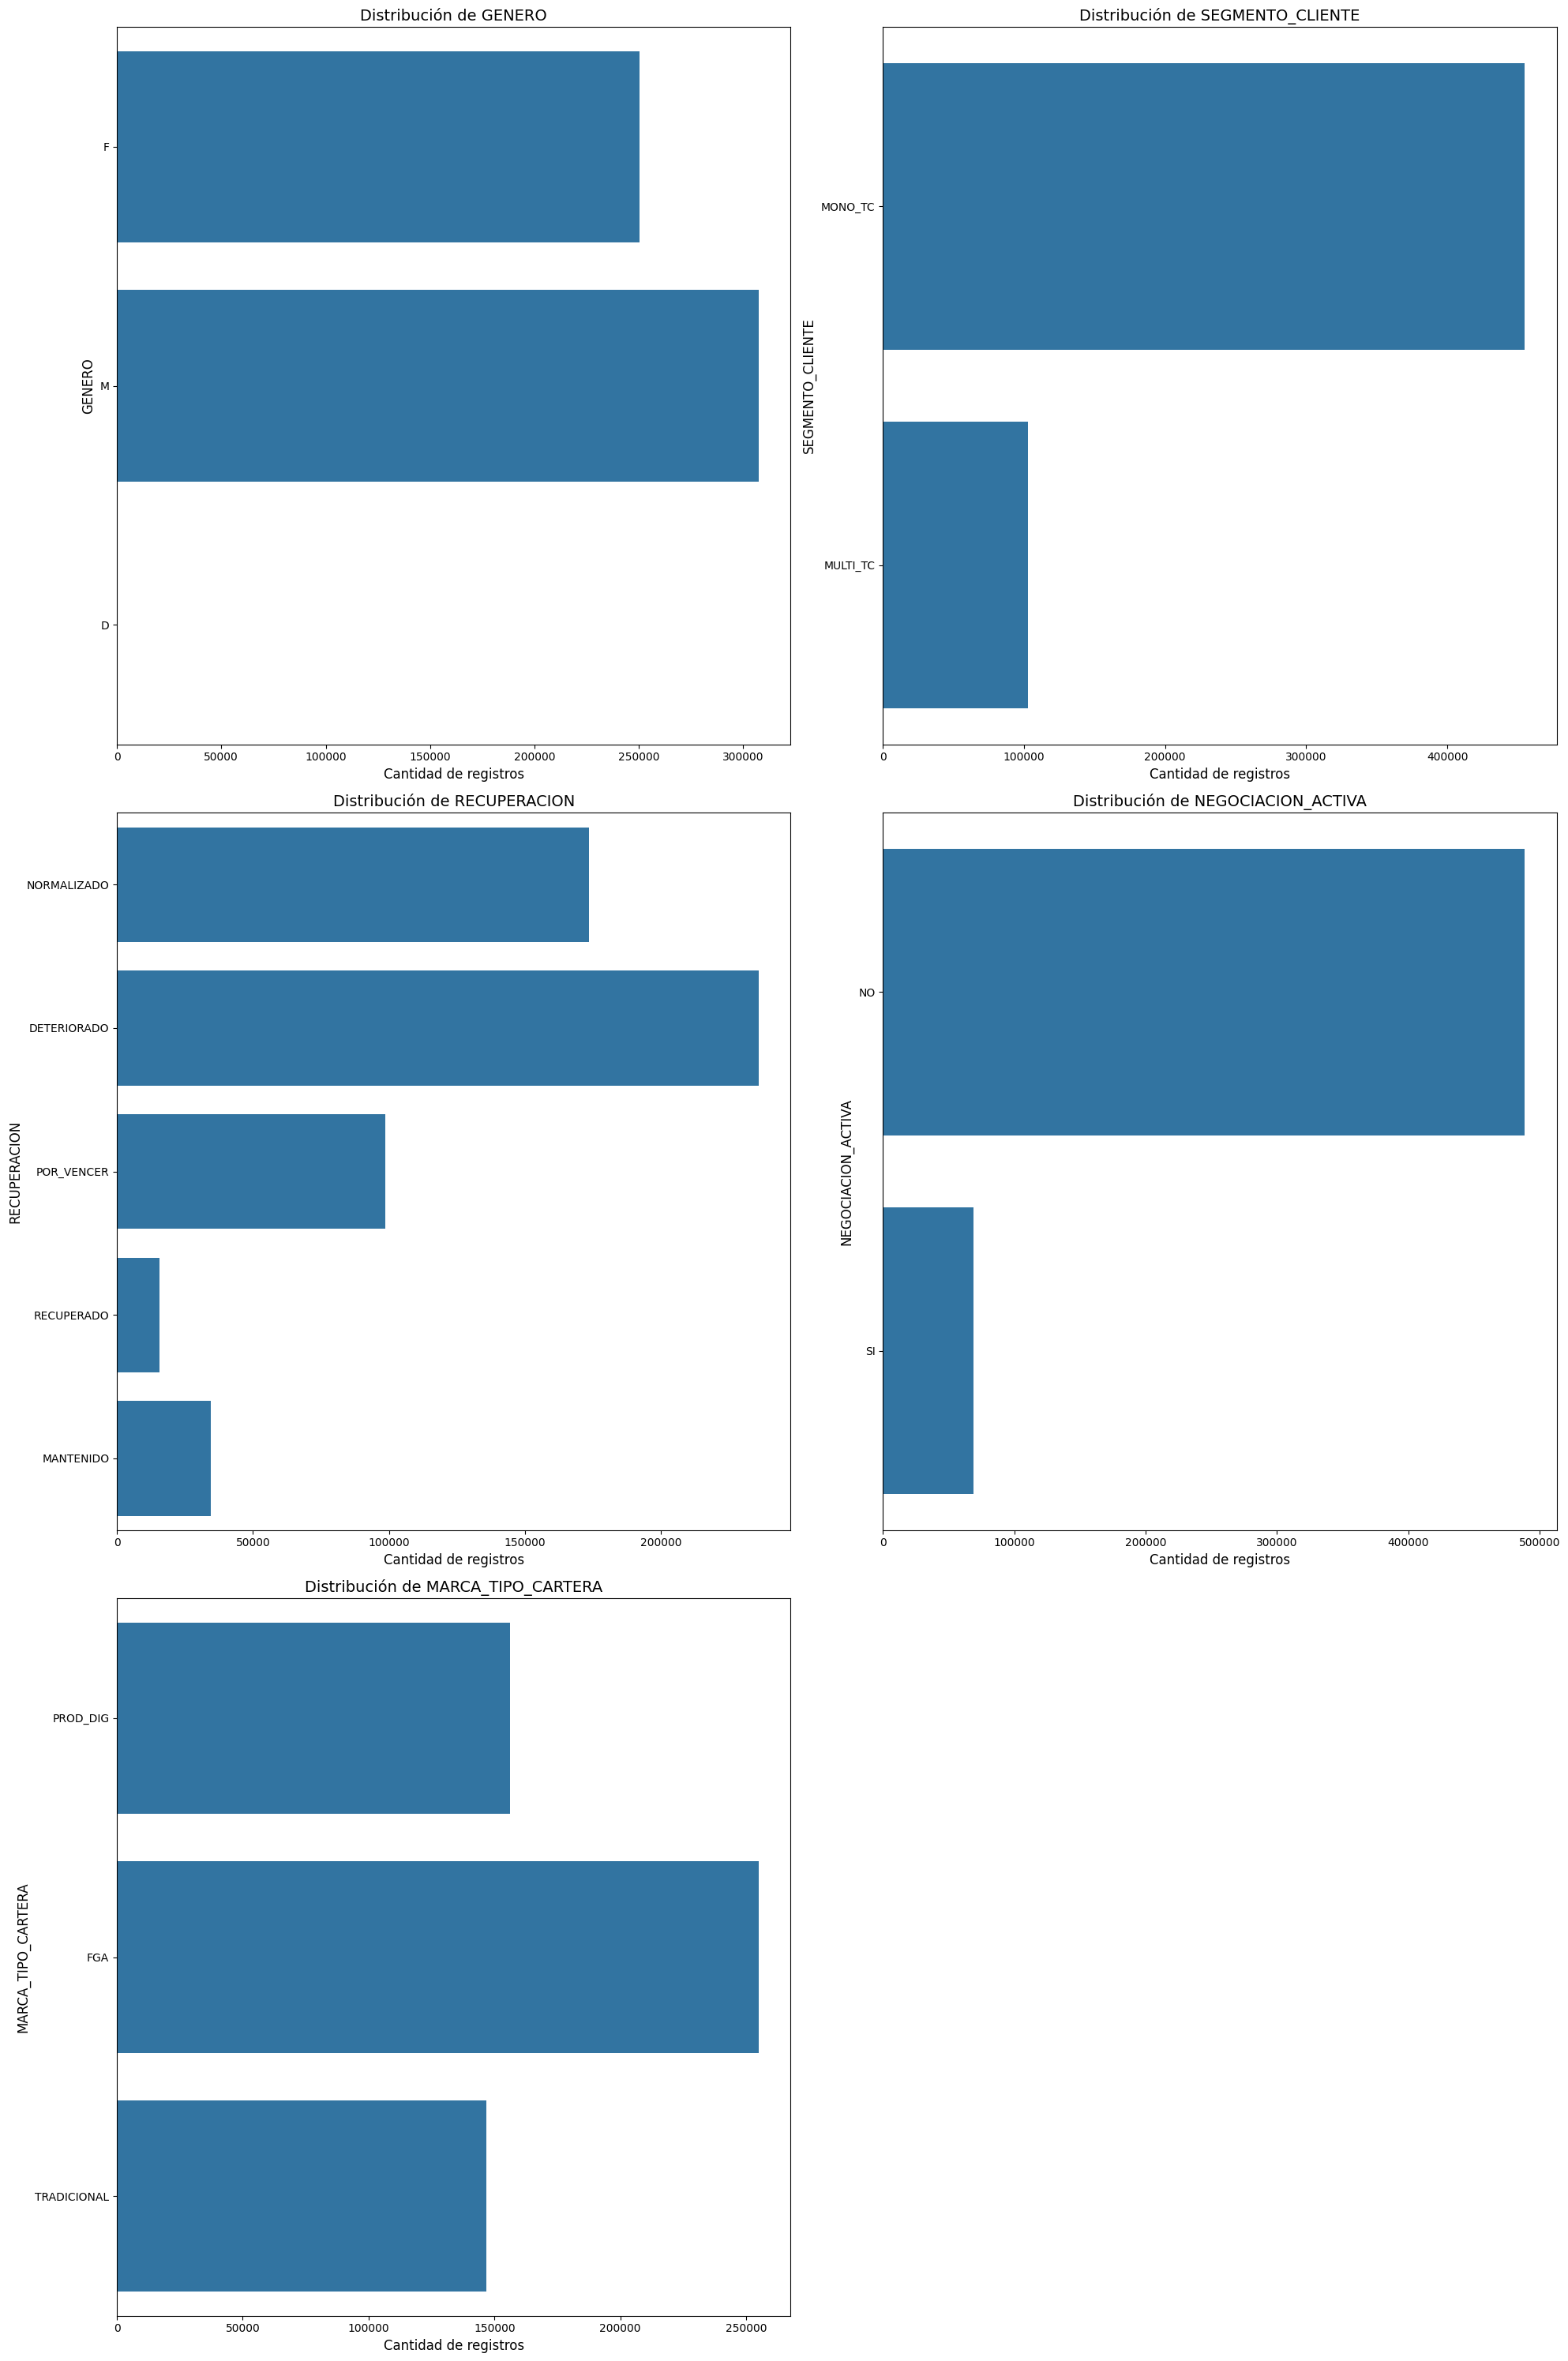

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas
categorical_variables = ['GENERO', 'SEGMENTO_CLIENTE','RECUPERACION','NEGOCIACION_ACTIVA','MARCA_TIPO_CARTERA']

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 30))

# Iterar sobre cada variable categórica
for i, variable in enumerate(categorical_variables, 1):
    # Crear un subplot para cada variable
    plt.subplot(3, 2, i)

    # Gráfico de barras para la distribución de la variable
    sns.countplot(data=df_categoricas, y=variable)

    # Configurar título y etiquetas
    plt.title(f'Distribución de {variable}', fontsize=14)
    plt.xlabel('Cantidad de registros', fontsize=12)
    plt.ylabel(variable, fontsize=12)

# Ajustar automáticamente la disposición de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [ ]:
# Obtén las columnas que deseas codificar
columnas_a_codificar = ['GENERO', 'SEGMENTO_CLIENTE', 'RECUPERACION', 'NEGOCIACION_ACTIVA', 'MARCA_TIPO_CARTERA']

# Aplica la codificación one-hot
df_categoricas_encoded = pd.get_dummies(df_categoricas, columns=columnas_a_codificar)
df_categoricas_encoded

,GENERO_D,GENERO_F,GENERO_M,SEGMENTO_CLIENTE_MONO_TC,SEGMENTO_CLIENTE_MULTI_TC,RECUPERACION_DETERIORADO,RECUPERACION_MANTENIDO,RECUPERACION_NORMALIZADO,RECUPERACION_POR_VENCER,RECUPERACION_RECUPERADO,NEGOCIACION_ACTIVA_NO,NEGOCIACION_ACTIVA_SI,MARCA_TIPO_CARTERA_FGA,MARCA_TIPO_CARTERA_PROD_DIG,MARCA_TIPO_CARTERA_TRADICIONAL
0,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
1,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
2,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
3,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
4,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557724,False,False,True,True,False,False,False,True,False,False,True,False,False,True,False
557725,False,False,True,True,False,False,False,True,False,False,True,False,False,True,False
557726,False,False,True,True,False,False,False,False,True,False,True,False,True,False,False
557727,False,False,True,True,False,False,False,False,True,False,True,False,True,False,False


# ➡️ **Variables predictoras**

---

Las variables predictoras, también conocidas como variables independientes o variables explicativas, son un tipo de variable en estadística y aprendizaje automático que se utiliza para predecir o explicar el valor de otra variable, denominada variable dependiente o variable de respuesta. En otras palabras, las variables predictoras contienen información que se utiliza para modelar la relación entre las variables y comprender cómo una variable afecta a otra.
tiene menú contextual

In [ ]:
predictoras.head(5)

,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2
0,15:45:12,15,Tarde,Tarde
1,9:50:27,9,Mañana,Mañana
2,9:49:51,9,Mañana,Mañana
3,10:02:47,10,Mañana,Mañana
4,14:23:01,14,Tarde,Mediodia


....

In [ ]:
# Combinar los DataFrames en uno solo
df = pd.concat([df_categoricas, df_numericas,predictoras['HORA']], axis=1)
df

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,HORA
0,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,15:45:12
1,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,9:50:27
2,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,9:49:51
3,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,10:02:47
4,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,14:23:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557724,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,50,54,0,60,0,...,66,46,9,6,3,23,6,0,3,10:49:08
557725,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,52,0,30,0,...,25,19,4,3,3,19,6,2,3,15:21:01
557726,M,MONO_TC,POR_VENCER,NO,FGA,5,41,4,30,30,...,10,2,2,3,3,19,3,2,3,11:46:55
557727,M,MONO_TC,POR_VENCER,NO,FGA,32,41,4,30,30,...,10,2,2,3,3,19,3,2,3,9:36:57


In [ ]:
# Combinar los DataFrames en uno solo
df1 = pd.concat([df_categoricas, df_numericas,predictoras['HORA_OK']], axis=1)
df1

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,HORA_OK
0,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,15
1,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,9
2,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,9
3,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,10
4,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557724,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,50,54,0,60,0,...,66,46,9,6,3,23,6,0,3,10
557725,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,52,0,30,0,...,25,19,4,3,3,19,6,2,3,15
557726,M,MONO_TC,POR_VENCER,NO,FGA,5,41,4,30,30,...,10,2,2,3,3,19,3,2,3,11
557727,M,MONO_TC,POR_VENCER,NO,FGA,32,41,4,30,30,...,10,2,2,3,3,19,3,2,3,9


In [ ]:
# Combinar los DataFrames en uno solo
df2 = pd.concat([df_categoricas, df_numericas,predictoras['RANGO_HORA']], axis=1)
df2

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
0,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,Tarde
1,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,Mañana
2,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,Mañana
3,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,Mañana
4,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,Tarde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557724,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,50,54,0,60,0,...,66,46,9,6,3,23,6,0,3,Mañana
557725,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,52,0,30,0,...,25,19,4,3,3,19,6,2,3,Tarde
557726,M,MONO_TC,POR_VENCER,NO,FGA,5,41,4,30,30,...,10,2,2,3,3,19,3,2,3,Mañana
557727,M,MONO_TC,POR_VENCER,NO,FGA,32,41,4,30,30,...,10,2,2,3,3,19,3,2,3,Mañana


In [ ]:
df2.to_csv("prueba.csv",encoding="latin-1")

In [ ]:
# Combinar los DataFrames en uno solo
df3 = pd.concat([df_categoricas, df_numericas,predictoras['RANGO_HORA2']], axis=1)
df3

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA2
0,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,Tarde
1,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,Mañana
2,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,21,23,0,30,0,...,9,1,1,3,3,26,6,6,3,Mañana
3,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,2,3,Mañana
4,F,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,23,0,30,0,...,9,1,1,3,3,26,6,6,3,Mediodia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557724,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,50,54,0,60,0,...,66,46,9,6,3,23,6,0,3,Mañana
557725,M,MONO_TC,NORMALIZADO,NO,PROD_DIG,5,52,0,30,0,...,25,19,4,3,3,19,6,2,3,Tarde
557726,M,MONO_TC,POR_VENCER,NO,FGA,5,41,4,30,30,...,10,2,2,3,3,19,3,2,3,Mañana
557727,M,MONO_TC,POR_VENCER,NO,FGA,32,41,4,30,30,...,10,2,2,3,3,19,3,2,3,Mañana


## Filtrado para seleccion de caracteristicas

Vamos a convertir todas las variables categóricas en el DataFrame **df2** en variables numéricas utilizando **LabelEncoder**, lo que facilita su uso en modelos de machine learning que requieren variables numéricas como entrada

In [ ]:
le = LabelEncoder()
df_encoded = df2.copy()  # Hacer una copia del DataFrame original
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

## Umbral de varianza

El umbral de varianza, también conocido como filtro de varianza, es un parámetro utilizado en técnicas de selección de características en el aprendizaje automático y la minería de datos. Su función principal es eliminar las características que no aportan información significativa al modelo, es decir, aquellas que tienen una varianza muy baja.


In [ ]:
# Umbral de varianza
def apply_variance_threshold(df, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(df)
    return df[df.columns[selector.get_support(indices=True)]]

df2_filtered_variance = apply_variance_threshold(df2, threshold=0.1)
df2_filtered_variance

ValueError: could not convert string to float: 'F'

In [ ]:
# Codificar variables categóricas si es necesario
# Esto es necesario para algunas técnicas, como el análisis factorial
# Si todas tus variables son numéricas, este paso puede omitirse
le = LabelEncoder()
df_encoded = df2.copy()  # Hacer una copia del DataFrame original
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Umbral de varianza
def apply_variance_threshold(df, threshold=0.0):
    selector = VarianceThreshold(threshold)
    selector.fit(df)
    return df[df.columns[selector.get_support(indices=True)]]

df_filtered_variance = apply_variance_threshold(df_encoded, threshold=0.1)

# Correlación
correlation_matrix = df_encoded.corr()

# Chi-cuadrado
def apply_chi2(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    chi2_scores, p_values = chi2(X, y)
    chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})
    return chi2_results

target_column = 'RANGO_HORA'  # Reemplaza 'TARGET_VARIABLE' con el nombre de tu variable objetivo
chi2_results = apply_chi2(df_encoded, target_column)

# ANOVA
def apply_anova(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    f_scores, p_values = f_classif(X, y)
    anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'P-value': p_values})
    return anova_results

anova_results = apply_anova(df_encoded, target_column)

# Análisis de Componentes Principales (PCA)
def apply_pca(df, n_components=None):
    pca = PCA(n_components)
    pca.fit(df)
    return pca

n_components_pca = 10  # Número de componentes principales
pca = apply_pca(df_encoded, n_components_pca)
pca_components = pca.components_

# Análisis Factorial (FA)
def apply_factor_analysis(df, n_components=None):
    fa = FactorAnalysis(n_components)
    fa.fit(df)
    return fa

n_components_fa = 5  # Número de componentes para el análisis factorial
fa = apply_factor_analysis(df_encoded, n_components_fa)
fa_components = fa.components_

### Matriz de correlacion

es una herramienta que nos ayuda a entender las relaciones entre las diferentes variables de entrada o características (features) en nuestro conjunto de datos. Esta matriz nos proporciona información sobre la fuerza y la dirección de las relaciones lineales entre las variables y es útil para:

- **Identificar relaciones lineales**: La matriz de correlación nos ayuda a identificar si hay relaciones lineales entre las variables. Esto es importante porque algunos algoritmos de machine learning, como la regresión lineal, asumen que las variables están linealmente relacionadas.

- **Selección de características**: Podemos usar la matriz de correlación para identificar características que estén altamente correlacionadas entre sí. Esto puede ser útil en tareas de selección de características, donde queremos eliminar características redundantes para simplificar el modelo y reducir el riesgo de sobreajuste.

- **Entender la importancia de las características**: Las características con alta correlación con la variable objetivo pueden ser importantes predictores en el modelo. La matriz de correlación nos ayuda a identificar estas características importantes y a priorizarlas en nuestro análisis.

- **Detectar multicolinealidad**: La multicolinealidad es una situación en la que dos o más variables predictoras están altamente correlacionadas entre sí. Esto puede causar problemas en algunos modelos de machine learning, como la regresión lineal, donde puede hacer que los coeficientes sean difíciles de interpretar. La matriz de correlación nos ayuda a detectar la presencia de multicolinealidad en los datos.

In [ ]:
correlation_matrix

,GENERO,SEGMENTO_CLIENTE,RECUPERACION,NEGOCIACION_ACTIVA,MARCA_TIPO_CARTERA,PRIORIDAD,EDAD,RIESGO_ACTUAL,MORA_INICIAL,MORA_ACTUAL,...,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,DESC_ACTIVIDAD_codificado,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,ESTADO_ICS_ACTUAL,MOTIVO_NO_PAGO_codificado,SUB_PRODUCTO_codificado,RANGO_HORA
GENERO,1.000000,0.058616,-0.031072,0.013926,0.011914,-0.017228,0.005602,0.023868,0.042387,0.050053,...,-0.003603,-0.014775,0.021912,0.008148,-0.007565,0.008007,0.011561,0.012193,-0.004032,-0.003290
SEGMENTO_CLIENTE,0.058616,1.000000,-0.085361,0.223475,0.093978,-0.044024,0.013521,0.207941,0.478532,0.405901,...,-0.111894,-0.253720,-0.025101,-0.037175,0.036499,-0.049412,0.063715,0.032460,-0.219939,0.011464
RECUPERACION,-0.031072,-0.085361,1.000000,-0.079895,-0.099710,-0.056745,-0.023532,-0.203822,0.008657,-0.577460,...,-0.323173,-0.268919,-0.197154,-0.002145,0.030298,0.165272,-0.046639,0.012534,0.054448,0.002269
NEGOCIACION_ACTIVA,0.013926,0.223475,-0.079895,1.000000,0.086255,-0.023964,0.025543,0.139261,0.175511,0.199017,...,0.028722,-0.021507,0.128283,0.000870,0.074945,0.165384,-0.197982,0.006306,-0.048070,0.000775
MARCA_TIPO_CARTERA,0.011914,0.093978,-0.099710,0.086255,1.000000,0.012999,0.297045,0.267056,0.015292,0.033026,...,0.070516,0.059502,0.045501,0.086830,0.004545,-0.020264,0.030513,-0.011770,-0.151549,0.003055
PRIORIDAD,-0.017228,-0.044024,-0.056745,-0.023964,0.012999,1.000000,0.020642,0.030180,0.030143,0.065484,...,0.117685,0.110005,0.148673,-0.019768,-0.000671,-0.160154,-0.003559,-0.106938,0.010766,0.018023
EDAD,0.005602,0.013521,-0.023532,0.025543,0.297045,0.020642,1.000000,0.131501,0.006540,0.012555,...,0.020160,0.017009,0.110288,0.140264,-0.015257,-0.032620,0.041249,-0.046151,-0.035624,-0.016579
RIESGO_ACTUAL,0.023868,0.207941,-0.203822,0.139261,0.267056,0.030180,0.131501,1.000000,0.100429,0.430164,...,0.056333,-0.016347,0.088138,0.006084,-0.009285,-0.172462,0.088889,-0.009361,-0.069285,0.001048
MORA_INICIAL,0.042387,0.478532,0.008657,0.175511,0.015292,0.030143,0.006540,0.100429,1.000000,0.526692,...,0.045062,-0.063896,0.020095,-0.020177,0.032979,-0.013970,-0.038375,-0.002184,-0.113034,-0.000342
MORA_ACTUAL,0.050053,0.405901,-0.577460,0.199017,0.033026,0.065484,0.012555,0.430164,0.526692,1.000000,...,0.189392,0.048459,0.155017,-0.025024,-0.028135,-0.286137,0.072099,-0.012630,-0.111676,-0.002040


### Chi 2

**Feature**: Esta columna muestra el nombre de la característica o variable analizada.

**Chi2 Score**: Este es el valor del estadístico chi-cuadrado calculado para cada característica. Cuanto mayor sea este valor, mayor es la dependencia entre la variable y la variable objetivo.

**P-value**: Este valor indica la probabilidad de observar los datos si la hipótesis nula de independencia entre la variable y la variable objetivo fuera verdadera. Un valor de p bajo (generalmente por debajo de 0.05) sugiere que la característica es significativa para predecir la variable objetivo.

Ahora, veamos algunos detalles destacados de estos resultados:

**SEGMENTO_CLIENTE**: Tiene un alto Chi2 Score y un p-value muy bajo, lo que sugiere que esta característica es altamente significativa para predecir la variable objetivo.

**PRIORIDAD, C_RIESGO**, **F_APERTURA**, **CANTIDAD_GESTIONES**, **GESTION_LLAMADAS**, y **CONTEO_CONTACTOS_DIRECTOS**: Todas estas características tienen un Chi2 Score muy alto y un p-value de 0, lo que indica que son altamente significativas para predecir la variable objetivo.

**GENERO, RECUPERACION, NEGOCIACION_ACTIVA, MORA_INICIAL, RIESGO_ACTUAL, SALDO_OBLIG, DIAS_OBLIG, DIAS_CL, y MOTIVO_NO_PAGO_codificado**: Estas características tienen **Chi2 Scores** más bajos y **p-values** más altos, lo que sugiere que tienen una menor influencia en la variable objetivo en comparación con las características mencionadas anteriormente.

In [ ]:
chi2_results

,Feature,Chi2 Score,P-value
0,GENERO,0.963191,3.263841e-01
1,SEGMENTO_CLIENTE,59.769835,1.066252e-14
2,RECUPERACION,3.437154,6.374543e-02
3,NEGOCIACION_ACTIVA,0.293566,5.879442e-01
4,MARCA_TIPO_CARTERA,4.406944,3.579290e-02
5,PRIORIDAD,2019.354393,0.000000e+00
6,EDAD,679.180175,1.007417e-149
7,RIESGO_ACTUAL,1.766863,1.837708e-01
8,MORA_INICIAL,0.640368,4.235777e-01
9,MORA_ACTUAL,73.291554,1.118455e-17


### ANOVA

**Feature**: El nombre de la característica o variable analizada.

**F-score**: Este es el valor del estadístico F calculado para cada característica. El **F-score** compara la varianza entre grupos con la varianza dentro de los grupos. Un valor alto indica que las medias de los grupos son diferentes.

**P-value**: Este valor indica la probabilidad de observar los datos si la hipótesis nula de que no hay diferencia entre las medias de los grupos fuera verdadera. Un valor de **p** bajo (generalmente por debajo de 0.05) sugiere que la característica es significativa para predecir la variable objetivo.

Ahora, algunas observaciones sobre estos resultados:

**SEGMENTO_CLIENTE**: Tiene un alto **F-score** y un **p-value** muy bajo, lo que sugiere que esta característica es altamente significativa para predecir la variable objetivo.

**PRIORIDAD, EDAD, C_RIESGO, F_APERTURA, CANTIDAD_GESTIONES, GESTION_LLAMADAS y CONTEO_CONTACTOS_DIRECTOS**: Todas estas características tienen **F-scores** altos y **p-values** muy bajos, lo que indica que son altamente significativas para predecir la variable objetivo.

**GENERO, MARCA_TIPO_CARTERA, CICLO_OBLIG, MORA_OBLIG, y ACCION_MEJOR_CONTACTO**: Estas características también tienen **p-values** bajos, aunque sus **F-scores** son relativamente más bajos, lo que sugiere que son significativas pero tal vez no tan influyentes como las mencionadas anteriormente.

**NEGOCIACION_ACTIVA, RIESGO_ACTUAL, MORA_INICIAL, MORA_ACTUAL, DIAS_ACTUAL, SALDO_OBLIG, DIAS_OBLIG, DIAS_CL, RANGO_CL, SCORE, EFECTO_MEJOR_CONTACTO, ESTADO_ICS_ACTUAL, MOTIVO_NO_PAGO_codificado, y SUB_PRODUCTO_codificado**: Estas características tienen **F-scores** más bajos y **p-values** más altos, lo que sugiere que tienen una menor influencia en la variable objetivo en comparación con las características mencionadas anteriormente.

In [ ]:
anova_results

,Feature,F-score,P-value
0,GENERO,6.037981,1.400159e-02
1,SEGMENTO_CLIENTE,73.312749,1.109250e-17
2,RECUPERACION,2.871287,9.017329e-02
3,NEGOCIACION_ACTIVA,0.335119,5.626603e-01
4,MARCA_TIPO_CARTERA,5.205243,2.251924e-02
5,PRIORIDAD,181.216314,2.668801e-41
6,EDAD,153.340226,3.262523e-35
7,RIESGO_ACTUAL,0.612779,4.337436e-01
8,MORA_INICIAL,0.065266,7.983589e-01
9,MORA_ACTUAL,2.319948,1.277249e-01


### PCA

El Análisis de Componentes Principales (ACP), también conocido como Principal Component Analysis (PCA) en inglés, es una técnica estadística multivariante utilizada para reducir la dimensionalidad de un conjunto de datos mientras se conserva la máxima cantidad de información posible. En otras palabras, el PCA permite transformar un conjunto de datos con muchas variables correlacionadas en un conjunto de nuevas variables no correlacionadas, llamadas componentes principales, que capturan la mayor parte de la variabilidad de los datos originales.

Cómo funciona el PCA?
- **Estandarización de los datos**: Se estandarizan los datos restándoles la media y dividiéndolos por la desviación estándar de cada variable. Esto asegura que todas las variables tengan la misma escala y no afecten el proceso de cálculo de los componentes principales.
- **Cálculo de la matriz de covarianzas**: Se calcula la matriz de covarianzas, que representa la relación lineal entre las variables. Cada elemento de la matriz representa la covarianza entre dos variables específicas.
- **Descomposición en valores propios y vectores propios**: Se descompone la matriz de covarianzas en una matriz de valores propios y una matriz de vectores propios. Los valores propios representan la varianza capturada por cada componente principal, mientras que los vectores propios representan la dirección de cada componente principal en el espacio original de las variables.
- **Selección de componentes principales**: Se seleccionan los componentes principales que capturan la mayor cantidad de varianza total del conjunto de datos. Esto generalmente se realiza ordenando los valores propios de mayor a menor y seleccionando los componentes principales que acumulan un porcentaje significativo de la varianza total (por ejemplo, el 90%).
- **Transformación de los datos**: Se transforman los datos originales en las nuevas variables de los componentes principales. Esto implica multiplicar la matriz de datos estandarizados por la matriz de vectores propios seleccionados.

In [ ]:
n_components_pca = 10  # Número de componentes principales
pca = apply_pca(df_encoded, n_components_pca)
pca_components = pca.components_

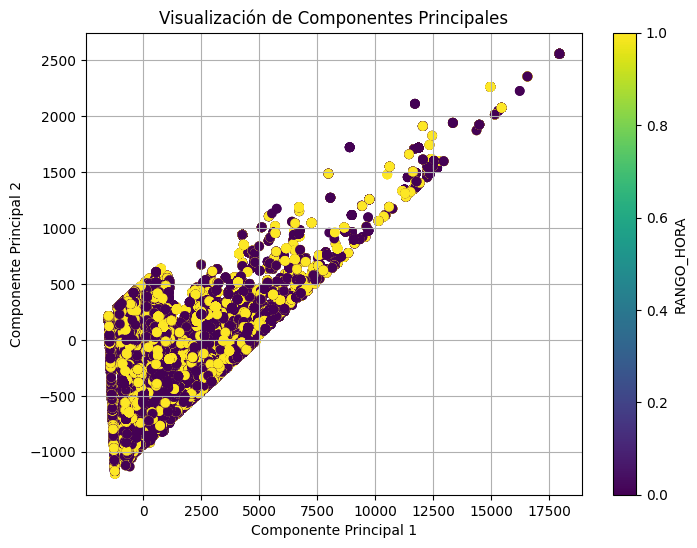

In [ ]:
pca_transformed = pca.transform(df_encoded)

# Grafica los datos en un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=df_encoded['RANGO_HORA'], cmap='viridis')
plt.title('Visualización de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='RANGO_HORA')  # Coloca una barra de color que mapea los valores de 'RANGO_HORA'
plt.grid(True)
plt.show()

In [ ]:
componentes_principales_df = pd.DataFrame(pca_components, columns=df_encoded.columns)

# Imprimir el DataFrame con los coeficientes de los componentes principales
print("Coeficientes de los componentes principales:")
componentes_principales_df

# Identificar las características más influyentes en cada componente principal
for i, row in componentes_principales_df.iterrows():
    print("\nComponente Principal", i+1, ":")
    top_features = row.abs().sort_values(ascending=False).head(3)  # Obtener las 3 características con mayores coeficientes
    print("Características más influyentes:")
    for feature, coef in top_features.items():
        print("-", feature, ": Coeficiente", coef)

# Considerar la variabilidad explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("\nProporción de varianza explicada por cada componente principal:")
for i, variance_ratio in enumerate(explained_variance_ratio):
    print("Componente Principal", i+1, ": {:.2f}%".format(variance_ratio * 100))

Coeficientes de los componentes principales:

Componente Principal 1 :
Características más influyentes:
- F_APERTURA : Coeficiente 0.9820717562478319
- SCORE : Coeficiente 0.15680841852961552
- C_RIESGO : Coeficiente 0.1045248877009691

Componente Principal 2 :
Características más influyentes:
- SCORE : Coeficiente 0.840649910731039
- C_RIESGO : Coeficiente 0.5076793406879553
- F_APERTURA : Coeficiente 0.1882995587205559

Componente Principal 3 :
Características más influyentes:
- C_RIESGO : Coeficiente 0.8536377204424582
- SCORE : Coeficiente 0.517414868333546
- MORA_ACTUAL : Coeficiente 0.03519174366189977

Componente Principal 4 :
Características más influyentes:
- CANTIDAD_GESTIONES : Coeficiente 0.5101636710615793
- MORA_ACTUAL : Coeficiente 0.5067973478179407
- DIAS_ACTUAL : Coeficiente 0.43392895363279294

Componente Principal 5 :
Características más influyentes:
- GESTION_LLAMADAS : Coeficiente 0.5468836328935898
- CANTIDAD_GESTIONES : Coeficiente 0.5295139740611672
- MORA_ACTU